#**Forest Cover Type Prediction**


# **Problem Description:**

The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch.
The data is in raw form (not scaled) and contains binary columns of data for qualitative independent variables such as wilderness areas and soil type.
You are asked to predict an integer classification for the forest cover type. The seven types are:

* cover type 1 = Spruce/Fir
* cover type 2 = Lodgepole Pine
* cover type 3 = Ponderosa Pine
* cover type 4 = Cottonwood/Willow
* cover type 5 = Aspen
* cover type 6 = Douglas-fir
* cover type 7 = Krummholz

# **Data** **contained**:
**Features of data**
* Elevation - Elevation in meters.
* Aspect - Aspect in degrees azimuth.
* Slope - Slope in degrees.
* Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
* Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features.
* Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway.
* Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice.
* Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice.
* Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice.
* Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points.
* Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation.
Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation.
Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation.



**The wilderness areas are:**

* 1 - Rawah Wilderness Area
* 2 - Neota Wilderness Area
* 3 - Comanche Peak Wilderness Area
* 4 - Cache la Poudre Wilderness Area

**The soil types are:**

* 1 Cathedral family - Rock outcrop complex, extremely stony.
* 2 Vanet - Ratake families complex, very stony.
* 3 Haploborolis - Rock outcrop complex, rubbly.
* 4 Ratake family - Rock outcrop complex, rubbly.
* 5 Vanet family - Rock outcrop complex complex, rubbly.
* 6 Vanet - Wetmore families - Rock outcrop complex, stony.
* 7 Gothic family.
* 8 Supervisor - Limber families complex.
* 9 Troutville family, very stony.
* 10 Bullwark - Catamount families - Rock outcrop complex, rubbly.
* 11 Bullwark - Catamount families - Rock land complex, rubbly.
* 12 Legault family - Rock land complex, stony.
* 13 Catamount family - Rock land - Bullwark family complex, rubbly.
* 14 Pachic Argiborolis - Aquolis complex.
* 15 unspecified in the USFS Soil and ELU Survey.
* 16 Cryaquolis - Cryoborolis complex.
* 17 Gateview family - Cryaquolis complex.
* 18 Rogert family, very stony.
* 19 Typic Cryaquolis - Borohemists complex.
* 20 Typic Cryaquepts - Typic Cryaquolls complex.
* 21 Typic Cryaquolls - Leighcan family, till substratum complex.
* 22 Leighcan family, till substratum, extremely bouldery.
* 23 Leighcan family, till substratum - Typic Cryaquolls complex.
* 24 Leighcan family, extremely stony.
* 25 Leighcan family, warm, extremely stony.
* 26 Granile - Catamount families complex, very stony.
* 27 Leighcan family, warm - Rock outcrop complex, extremely stony.
* 28 Leighcan family - Rock outcrop complex, extremely stony.
* 29 Como - Legault families complex, extremely stony.
* 30 Como family - Rock land - Legault family complex, extremely stony.
* 31 Leighcan - Catamount families complex, extremely stony.
* 32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
* 33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.
* 34 Cryorthents - Rock land complex, extremely stony.
* 35 Cryumbrepts - Rock outcrop - Cryaquepts complex.
* 36 Bross family - Rock land - Cryumbrepts complex, extremely stony.
* 37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
* 38 Leighcan - Moran families - Cryaquolls complex, extremely stony.
* 39 Moran family - Cryorthents - Leighcan family complex, extremely stony.
* 40 Moran family - Cryorthents - Rock land complex, extremely stony.

# import libraries

In [1]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10588 sha256=8d4f8178dcb3fc903897ba43100ae02aa5b8ef735eab0569bdc00ac3b28a2f4f
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from matplotlib import cm
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.feature_selection import SelectKBest

# Helper Functions

In [3]:
# function for TSNE visualization
def tens(X_data ,y_data,title):
  # Define a list of class names
  #class_names = ['Cover type 1', 'Cover type 2', 'Cover type 3', 'Cover type 4', 'Cover type 5', 'Cover type 6', 'Cover type 7']
  colormap = plt.cm.get_cmap('viridis', len(set(y_data)))  # Change the colormap as needed
  # Perform t-SNE dimensionality reduction on test set
  tsne_data = TSNE(n_components=2).fit_transform(X_data)
  # Plot t-SNE visualization for test set
  plt.figure(figsize=(8, 6))
  for i, Cover_type in enumerate(set(y_data)):
    plt.scatter(tsne_data[y_data == Cover_type, 0], tsne_data[y_data == Cover_type, 1], label=f'Cover_type {Cover_type}', c=[colormap(i)], s=50)
  plt.title(title)
  plt.xlabel('Dimension 1')
  plt.ylabel('Dimension 2')
  plt.legend()
  plt.show()

In [4]:
def plot(cmo,title):
  sns.heatmap(cmo ,cmap='viridis',annot=True,cbar_kws={'label':'color bar'},xticklabels=[1,2,3,4,5,6,7],yticklabels=[1,2,3,4,5,6,7],fmt='.1f')
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title(title)
  plt.show()

# load data

In [5]:
train_data=pd.read_csv("training_dataset.csv")
validation_data=pd.read_csv('validation_dataset.csv')
test_data=pd.read_csv('test_dataset.csv')

In [6]:
# merge the train and test data to use
# Concatenate the dataframes into a single dataframe
data_cluster = pd.concat([train_data, test_data], axis=0)
# Print the shape of the combined dataframe
print("Combined dataframe shape: ", data_cluster.shape)
data_cluster

Combined dataframe shape:  (9811, 56)


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0      8192       2976      85     23                                95   
1     14089       3104     233     12                               150   
2     10246       3385     160      7                               937   
3      8686       3191      41     14                               210   
4      9242       2821     297      4                                85   
...     ...        ...     ...    ...                               ...   
1520  11604       2850      99     23                                67   
1521  13693       2562      58     22                                85   
1522   2348       2784      88     12                               180   
1523  12422       2343     184     14                               361   
1524   3602       2104     154      9                                30   

      Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                 72                             2436   
1                                 40                             1503   
2                                204                             1224   
3                                 37                             3207   
4                                  1                              992   
...                              ...                              ...   
1520                              18                             4909   
1521                              26                              331   
1522                              -2                              510   
1523                             232                              912   
1524                              -1                             1290   

      Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
0               246             193             64  ...            0   
1               200             251            186  ...            0   
2               228             242            147  ...            0   
3               221             208            119  ...            1   
4               208             238            169  ...            0   
...             ...             ...            ...  ...          ...   
1520            250             201             65  ...            0   
1521            230             187             79  ...            0   
1522            238             220            112  ...            0   
1523            223             249            156  ...            0   
1524            231             241            141  ...            0   

      Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
0               0            0            0            0            0   
1               0            0            0            0            0   
2               0            0            0            0            0   
3               0            0            0            0            0   
4               0            0            0            0            0   
...           ...          ...          ...          ...          ...   
1520            0            0            0            0            0   
1521            0            0            0            0            0   
1522            0            0            0            0            0   
1523            0            0            0            0            0   
1524            0            0            0            0            0   

      Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
0               0            0            0           1  
1               0            0            0           1  
2               0            0            0           1  
3               0            0            0           1  
4               0            0            0           1  
...           ...          ...          ...         ...  
1520            0            0            0           1  
1521            0        

# insights about the data (EDA)


# EDA

#**Train data**

In [7]:
# Print the shape
print("train dataframe shape: ", train_data.shape)
print(train_data.info())
train_data

train dataframe shape:  (8286, 56)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8286 entries, 0 to 8285
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  8286 non-null   int64
 1   Elevation                           8286 non-null   int64
 2   Aspect                              8286 non-null   int64
 3   Slope                               8286 non-null   int64
 4   Horizontal_Distance_To_Hydrology    8286 non-null   int64
 5   Vertical_Distance_To_Hydrology      8286 non-null   int64
 6   Horizontal_Distance_To_Roadways     8286 non-null   int64
 7   Hillshade_9am                       8286 non-null   int64
 8   Hillshade_Noon                      8286 non-null   int64
 9   Hillshade_3pm                       8286 non-null   int64
 10  Horizontal_Distance_To_Fire_Points  8286 non-null   int64
 11  Wilderness_Area1                  

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0      8192       2976      85     23                                95   
1     14089       3104     233     12                               150   
2     10246       3385     160      7                               937   
3      8686       3191      41     14                               210   
4      9242       2821     297      4                                85   
...     ...        ...     ...    ...                               ...   
8281   9216       3294     328     13                               624   
8282   7129       3390      24      6                               216   
8283   9231       3350     100     18                               175   
8284   9656       3727       5     17                               984   
8285   2017       3379     180      0                               175   

      Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                 72                             2436   
1                                 40                             1503   
2                                204                             1224   
3                                 37                             3207   
4                                  1                              992   
...                              ...                              ...   
8281                             192                             3506   
8282                              13                             3332   
8283                             -26                             2121   
8284                             318                             4934   
8285                              37                             2672   

      Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
0               246             193             64  ...            0   
1               200             251            186  ...            0   
2               228             242            147  ...            0   
3               221             208            119  ...            1   
4               208             238            169  ...            0   
...             ...             ...            ...  ...          ...   
8281            188             224            175  ...            0   
8282            217             226            146  ...            0   
8283            247             212             88  ...            0   
8284            195             204            143  ...            0   
8285            219             238            157  ...            0   

      Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
0               0            0            0            0            0   
1               0            0            0            0            0   
2               0            0            0            0            0   
3               0            0            0            0            0   
4               0            0            0            0            0   
...           ...          ...          ...          ...          ...   
8281            0            0            0            0            0   
8282            0            0            0            0            1   
8283            0            0            0            0            0   
8284            0            0            0            0            0   
8285            0            0            0            0            0   

      Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
0               0            0            0           1  
1               0            0            0           1  
2               0            0            0           1  
3               0            0            0           1  
4               0            0            0           1  
...           ...          ...          ...         ...  
8281            0            0            1           7  
8282            0        

In [8]:
train_data.describe().T

count         mean          std     min  \
Id                                  8286.0  7609.998431  4291.741503     1.0   
Elevation                           8286.0  2732.983104   432.906958  1863.0   
Aspect                              8286.0   155.366643   108.392758     0.0   
Slope                               8286.0    16.868694     8.514811     0.0   
Horizontal_Distance_To_Hydrology    8286.0   225.249698   213.670866     0.0   
Vertical_Distance_To_Hydrology      8286.0    53.233888    62.890107  -134.0   
Horizontal_Distance_To_Roadways     8286.0  1629.840574  1259.714393     0.0   
Hillshade_9am                       8286.0   213.732682    30.675904    58.0   
Hillshade_Noon                      8286.0   218.534999    23.142959    99.0   
Hillshade_3pm                       8286.0   133.007120    46.730190     0.0   
Horizontal_Distance_To_Fire_Points  8286.0  1461.559739  1053.310891     0.0   
Wilderness_Area1                    8286.0     0.206493     0.404813     0.0   
Wilderness_Area2                    8286.0     0.030533     0.172060     0.0   
Wilderness_Area3                    8286.0     0.428796     0.494934     0.0   
Wilderness_Area4                    8286.0     0.334178     0.471731     0.0   
Soil_Type1                          8286.0     0.024982     0.156079     0.0   
Soil_Type2                          8286.0     0.045619     0.208670     0.0   
Soil_Type3                          8286.0     0.069877     0.254955     0.0   
Soil_Type4                          8286.0     0.062515     0.242103     0.0   
Soil_Type5                          8286.0     0.011586     0.107018     0.0   
Soil_Type6                          8286.0     0.048274     0.214358     0.0   
Soil_Type7                          8286.0     0.000000     0.000000     0.0   
Soil_Type8                          8286.0     0.000121     0.010986     0.0   
Soil_Type9                          8286.0     0.000603     0.024559     0.0   
Soil_Type10                         8286.0     0.145909     0.353036     0.0   
Soil_Type11                         8286.0     0.029930     0.170405     0.0   
Soil_Type12                         8286.0     0.009051     0.094713     0.0   
Soil_Type13                         8286.0     0.035723     0.185610     0.0   
Soil_Type14                         8286.0     0.010379     0.101353     0.0   
Soil_Type15                         8286.0     0.000000     0.000000     0.0   
Soil_Type16                         8286.0     0.007724     0.087551     0.0   
Soil_Type17                         8286.0     0.044533     0.206288     0.0   
Soil_Type18                         8286.0     0.004345     0.065775     0.0   
Soil_Type19                         8286.0     0.002293     0.047833     0.0   
Soil_Type20                         8286.0     0.006879     0.082659     0.0   
Soil_Type21                         8286.0     0.000603     0.024559     0.0   
Soil_Type22                         8286.0     0.009655     0.097789     0.0   
Soil_Type23                         8286.0     0.034395     0.182253     0.0   
Soil_Type24                         8286.0     0.011103     0.104791     0.0   
Soil_Type25                         8286.0     0.000121     0.010986     0.0   
Soil_Type26                         8286.0     0.003259     0.056994     0.0   
Soil_Type27                         8286.0     0.000603     0.024559     0.0   
Soil_Type28                         8286.0     0.000603     0.024559     0.0   
Soil_Type29                         8286.0     0.067705     0.251253     0.0   
Soil_Type30                         8286.0     0.053705     0.225448     0.0   
Soil_Type31                         8286.0     0.016655     0.127981     0.0   
Soil_Type32                         8286.0     0.035723     0.185610     0.0   
Soil_Type33                         8286.0     0.031620     0.174996     0.0   
Soil_Type34                         8286.0     0.001328     0.036413     0.0   
Soil_Type35                         8

#**Validation data**

In [9]:
# Print the shape
print("validation dataframe shape: ", validation_data.shape)
print(validation_data.info())
validation_data

validation dataframe shape:  (1498, 56)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498 entries, 0 to 1497
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  1498 non-null   int64
 1   Elevation                           1498 non-null   int64
 2   Aspect                              1498 non-null   int64
 3   Slope                               1498 non-null   int64
 4   Horizontal_Distance_To_Hydrology    1498 non-null   int64
 5   Vertical_Distance_To_Hydrology      1498 non-null   int64
 6   Horizontal_Distance_To_Roadways     1498 non-null   int64
 7   Hillshade_9am                       1498 non-null   int64
 8   Hillshade_Noon                      1498 non-null   int64
 9   Hillshade_3pm                       1498 non-null   int64
 10  Horizontal_Distance_To_Fire_Points  1498 non-null   int64
 11  Wilderness_Area1             

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0      6078       2432     147     16                                90   
1      7895       2653     114     14                               175   
2      6821       3542     315     31                               255   
3      1594       3191     286     20                                30   
4     11987       2160      64     37                               190   
...     ...        ...     ...    ...                               ...   
1493   4257       2062      75     12                                 0   
1494    812       2926      67     12                               324   
1495   7717       2595      98     19                               190   
1496   8662       2820     257     15                               127   
1497  14265       3079     130     22                               297   

      Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                  2                              484   
1                                 38                             2278   
2                                130                             3218   
3                                 12                             4965   
4                                 96                              240   
...                              ...                              ...   
1493                               0                              420   
1494                              45                             3055   
1495                               0                             1883   
1496                              23                             2496   
1497                              81                             1781   

      Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
0               240             236            120  ...            0   
1               244             225            107  ...            0   
2               124             198            206  ...            0   
3               162             235            212  ...            0   
4               225             140             15  ...            0   
...             ...             ...            ...  ...          ...   
1493            234             217            113  ...            0   
1494            232             217            116  ...            0   
1495            248             209             81  ...            0   
1496            183             248            202  ...            0   
1497            250             221             87  ...            0   

      Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
0               0            0            0            0            0   
1               0            0            0            0            0   
2               0            0            0            0            0   
3               0            0            0            0            0   
4               0            0            0            0            0   
...           ...          ...          ...          ...          ...   
1493            0            0            0            0            0   
1494            0            0            0            0            0   
1495            0            0            0            0            0   
1496            0            0            0            0            0   
1497            1            0            0            0            0   

      Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
0               0            0            0           6  
1               0            0            0           3  
2               0            0            1           1  
3               0            0            0           1  
4               0            0            0           3  
...           ...          ...          ...         ...  
1493            0            0            0           4  
1494            0        

In [10]:
validation_data.describe().T

count         mean          std     min  \
Id                                  1498.0  7562.141522  4356.857926     9.0   
Elevation                           1498.0  2749.556742   424.443747  1879.0   
Aspect                              1498.0   160.700267   108.854006     0.0   
Slope                               1498.0    16.697597     8.544512     1.0   
Horizontal_Distance_To_Hydrology    1498.0   229.946595   211.628457     0.0   
Vertical_Distance_To_Hydrology      1498.0    51.189586    62.357847  -115.0   
Horizontal_Distance_To_Roadways     1498.0  1711.573431  1305.919072    30.0   
Hillshade_9am                       1498.0   212.061415    31.237923    89.0   
Hillshade_Noon                      1498.0   219.622163    22.836852   107.0   
Hillshade_3pm                       1498.0   136.323765    45.932031     0.0   
Horizontal_Distance_To_Fire_Points  1498.0  1528.893858  1129.895567    30.0   
Wilderness_Area1                    1498.0     0.234980     0.424128     0.0   
Wilderness_Area2                    1498.0     0.039386     0.194576     0.0   
Wilderness_Area3                    1498.0     0.423899     0.494340     0.0   
Wilderness_Area4                    1498.0     0.301736     0.459164     0.0   
Soil_Type1                          1498.0     0.022697     0.148985     0.0   
Soil_Type2                          1498.0     0.036716     0.188126     0.0   
Soil_Type3                          1498.0     0.068091     0.251986     0.0   
Soil_Type4                          1498.0     0.066088     0.248519     0.0   
Soil_Type5                          1498.0     0.009346     0.096253     0.0   
Soil_Type6                          1498.0     0.044726     0.206771     0.0   
Soil_Type7                          1498.0     0.000000     0.000000     0.0   
Soil_Type8                          1498.0     0.000000     0.000000     0.0   
Soil_Type9                          1498.0     0.000668     0.025837     0.0   
Soil_Type10                         1498.0     0.139519     0.346603     0.0   
Soil_Type11                         1498.0     0.018024     0.133083     0.0   
Soil_Type12                         1498.0     0.018692     0.135479     0.0   
Soil_Type13                         1498.0     0.031375     0.174388     0.0   
Soil_Type14                         1498.0     0.013351     0.114812     0.0   
Soil_Type15                         1498.0     0.000000     0.000000     0.0   
Soil_Type16                         1498.0     0.008011     0.089173     0.0   
Soil_Type17                         1498.0     0.039386     0.194576     0.0   
Soil_Type18                         1498.0     0.007343     0.085405     0.0   
Soil_Type19                         1498.0     0.004673     0.068221     0.0   
Soil_Type20                         1498.0     0.008678     0.092783     0.0   
Soil_Type21                         1498.0     0.000668     0.025837     0.0   
Soil_Type22                         1498.0     0.024700     0.155260     0.0   
Soil_Type23                         1498.0     0.050734     0.219528     0.0   
Soil_Type24                         1498.0     0.012016     0.108993     0.0   
Soil_Type25                         1498.0     0.000000     0.000000     0.0   
Soil_Type26                         1498.0     0.004673     0.068221     0.0   
Soil_Type27                         1498.0     0.000668     0.025837     0.0   
Soil_Type28                         1498.0     0.000000     0.000000     0.0   
Soil_Type29                         1498.0     0.080107     0.271549     0.0   
Soil_Type30                         1498.0     0.042724     0.202301     0.0   
Soil_Type31                         1498.0     0.018024     0.133083     0.0   
Soil_Type32                         1498.0     0.047397     0.212556     0.0   
Soil_Type33                         1498.0     0.041389     0.199254     0.0   
Soil_Type34                         1498.0     0.002003     0.044721     0.0   
Soil_Type35                         1



---


#**Test data**



In [11]:
# Print the shape
print("test dataframe shape: ", test_data.shape)
print(test_data.info())
test_data

test dataframe shape:  (1525, 56)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  1525 non-null   int64
 1   Elevation                           1525 non-null   int64
 2   Aspect                              1525 non-null   int64
 3   Slope                               1525 non-null   int64
 4   Horizontal_Distance_To_Hydrology    1525 non-null   int64
 5   Vertical_Distance_To_Hydrology      1525 non-null   int64
 6   Horizontal_Distance_To_Roadways     1525 non-null   int64
 7   Hillshade_9am                       1525 non-null   int64
 8   Hillshade_Noon                      1525 non-null   int64
 9   Hillshade_3pm                       1525 non-null   int64
 10  Horizontal_Distance_To_Fire_Points  1525 non-null   int64
 11  Wilderness_Area1                   

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0      8405       2823     104     20                               573   
1     13220       2453     157      7                               474   
2      7650       3156     110      6                               162   
3     14941       2471     186     16                               175   
4     12548       2292     177     29                               443   
...     ...        ...     ...    ...                               ...   
1520  11604       2850      99     23                                67   
1521  13693       2562      58     22                                85   
1522   2348       2784      88     12                               180   
1523  12422       2343     184     14                               361   
1524   3602       2104     154      9                                30   

      Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                191                             2608   
1                                183                              806   
2                                 24                             1101   
3                                 67                              972   
4                                152                             1315   
...                              ...                              ...   
1520                              18                             4909   
1521                              26                              331   
1522                              -2                              510   
1523                             232                              912   
1524                              -1                             1290   

      Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
0               249             210             80  ...            0   
1               228             241            146  ...            0   
2               230             234            138  ...            0   
3               221             250            157  ...            0   
4               219             242            134  ...            0   
...             ...             ...            ...  ...          ...   
1520            250             201             65  ...            0   
1521            230             187             79  ...            0   
1522            238             220            112  ...            0   
1523            223             249            156  ...            0   
1524            231             241            141  ...            0   

      Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
0               0            0            0            0            0   
1               0            0            0            0            0   
2               0            0            0            0            0   
3               0            0            0            0            0   
4               0            0            0            0            0   
...           ...          ...          ...          ...          ...   
1520            0            0            0            0            0   
1521            0            0            0            0            0   
1522            0            0            0            0            0   
1523            0            0            0            0            0   
1524            0            0            0            0            0   

      Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
0               0            0            0           3  
1               0            0            0           3  
2               0            0            0           1  
3               0            0            0           3  
4               0            0            0           4  
...           ...          ...          ...         ...  
1520            0            0            0           1  
1521            0        

In [12]:
test_data.describe().T

count         mean          std     min  \
Id                                  1525.0  7559.973770  4388.971897     4.0   
Elevation                           1525.0  2735.860984   430.089563  1874.0   
Aspect                              1525.0   151.527213   108.633930     0.0   
Slope                               1525.0    16.545574     8.511536     0.0   
Horizontal_Distance_To_Hydrology    1525.0   231.399344   222.534352     0.0   
Vertical_Distance_To_Hydrology      1525.0    53.087213    64.622797  -108.0   
Horizontal_Distance_To_Roadways     1525.0  1694.068197  1309.355305    30.0   
Hillshade_9am                       1525.0   214.243934    29.533171    65.0   
Hillshade_Noon                      1525.0   218.283279    23.159036   111.0   
Hillshade_3pm                       1525.0   132.590820    45.322776     0.0   
Horizontal_Distance_To_Fire_Points  1525.0  1454.604590  1059.814339    30.0   
Wilderness_Area1                    1525.0     0.221639     0.415486     0.0   
Wilderness_Area2                    1525.0     0.032131     0.176406     0.0   
Wilderness_Area3                    1525.0     0.417705     0.493343     0.0   
Wilderness_Area4                    1525.0     0.328525     0.469831     0.0   
Soil_Type1                          1525.0     0.028852     0.167447     0.0   
Soil_Type2                          1525.0     0.038033     0.191338     0.0   
Soil_Type3                          1525.0     0.070164     0.255507     0.0   
Soil_Type4                          1525.0     0.047869     0.213559     0.0   
Soil_Type5                          1525.0     0.011148     0.105026     0.0   
Soil_Type6                          1525.0     0.040000     0.196023     0.0   
Soil_Type7                          1525.0     0.000000     0.000000     0.0   
Soil_Type8                          1525.0     0.000000     0.000000     0.0   
Soil_Type9                          1525.0     0.000000     0.000000     0.0   
Soil_Type10                         1525.0     0.135738     0.342622     0.0   
Soil_Type11                         1525.0     0.030164     0.171094     0.0   
Soil_Type12                         1525.0     0.016393     0.127025     0.0   
Soil_Type13                         1525.0     0.028852     0.167447     0.0   
Soil_Type14                         1525.0     0.015738     0.124500     0.0   
Soil_Type15                         1525.0     0.000000     0.000000     0.0   
Soil_Type16                         1525.0     0.008525     0.091964     0.0   
Soil_Type17                         1525.0     0.051803     0.221702     0.0   
Soil_Type18                         1525.0     0.003279     0.057185     0.0   
Soil_Type19                         1525.0     0.002623     0.051164     0.0   
Soil_Type20                         1525.0     0.008525     0.091964     0.0   
Soil_Type21                         1525.0     0.001311     0.036202     0.0   
Soil_Type22                         1525.0     0.024918     0.155926     0.0   
Soil_Type23                         1525.0     0.052459     0.223024     0.0   
Soil_Type24                         1525.0     0.023607     0.151870     0.0   
Soil_Type25                         1525.0     0.000000     0.000000     0.0   
Soil_Type26                         1525.0     0.001967     0.044324     0.0   
Soil_Type27                         1525.0     0.000656     0.025607     0.0   
Soil_Type28                         1525.0     0.000656     0.025607     0.0   
Soil_Type29                         1525.0     0.072131     0.258790     0.0   
Soil_Type30                         1525.0     0.045246     0.207911     0.0   
Soil_Type31                         1525.0     0.022951     0.149796     0.0   
Soil_Type32                         1525.0     0.038033     0.191338     0.0   
Soil_Type33                         1525.0     0.040656     0.197556     0.0   
Soil_Type34                         1525.0     0.002623     0.051164     0.0   
Soil_Type35                         1



---


"Our datasets consists of 3 dataset used :[train & validation & test]
* In Train data their are a  8286 samples , 55 features and one target,
* In Test data their are a  1525 samples , 55 features  and one target,
* In validation data their are a  1498 samples , 55 features  and one target,

the total data contains 11309 rows × 56 columns

---



 where each sample is a numerical measurement of various characteristics of a Forest. The features include the Elevation, Aspect , Slope ,Horizontal_Distance_To_Hydrology , Vertical_Distance_To_Hydrology ,
, Horizontal_Distance_To_Roadways ,Hillshade_9am ,Hillshade_Noon , Hillshade_3pm ,Horizontal_Distance_To_Fire_Points , 4 binary data of Wilderness_Area, 40 binary data of Soil_Type,7 types of Cover_Type.

The data are in the form of a CSVs files.

---



#**The whole data**

In [13]:
# Concatenate the dataframes into a single dataframe
whole_data = pd.concat([train_data, validation_data, test_data], axis=0)
ModelTrainData=pd.concat([train_data, validation_data ],axis=0)
# Print the shape of the combined dataframe
print("Combined dataframe shape: ", whole_data.shape)
whole_data

Combined dataframe shape:  (11309, 56)


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0      8192       2976      85     23                                95   
1     14089       3104     233     12                               150   
2     10246       3385     160      7                               937   
3      8686       3191      41     14                               210   
4      9242       2821     297      4                                85   
...     ...        ...     ...    ...                               ...   
1520  11604       2850      99     23                                67   
1521  13693       2562      58     22                                85   
1522   2348       2784      88     12                               180   
1523  12422       2343     184     14                               361   
1524   3602       2104     154      9                                30   

      Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                 72                             2436   
1                                 40                             1503   
2                                204                             1224   
3                                 37                             3207   
4                                  1                              992   
...                              ...                              ...   
1520                              18                             4909   
1521                              26                              331   
1522                              -2                              510   
1523                             232                              912   
1524                              -1                             1290   

      Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
0               246             193             64  ...            0   
1               200             251            186  ...            0   
2               228             242            147  ...            0   
3               221             208            119  ...            1   
4               208             238            169  ...            0   
...             ...             ...            ...  ...          ...   
1520            250             201             65  ...            0   
1521            230             187             79  ...            0   
1522            238             220            112  ...            0   
1523            223             249            156  ...            0   
1524            231             241            141  ...            0   

      Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
0               0            0            0            0            0   
1               0            0            0            0            0   
2               0            0            0            0            0   
3               0            0            0            0            0   
4               0            0            0            0            0   
...           ...          ...          ...          ...          ...   
1520            0            0            0            0            0   
1521            0            0            0            0            0   
1522            0            0            0            0            0   
1523            0            0            0            0            0   
1524            0            0            0            0            0   

      Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
0               0            0            0           1  
1               0            0            0           1  
2               0            0            0           1  
3               0            0            0           1  
4               0            0            0           1  
...           ...          ...          ...         ...  
1520            0            0            0           1  
1521            0        

In [14]:
# Sort the dataframe by the ID column
data_sorted = whole_data.sort_values(by='Id')

# Print the sorted dataframe
data_sorted

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
4539      1       2596      51      3                               258   
5378      2       2590      56      2                               212   
703       3       2804     139      9                               268   
58        4       2785     155     18                               242   
5168      5       2595      45      2                               153   
...     ...        ...     ...    ...                               ...   
1279  15114       2688     104     15                               443   
663   15115       2670     108     12                               624   
267   15117       2603     121     19                               633   
952   15119       2487     167     28                               218   
1691  15120       2475     197     34                               319   

      Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
4539                               0                              510   
5378                              -6                              390   
703                               65                             3180   
58                               118                             3090   
5168                              -1                              391   
...                              ...                              ...   
1279                              10                              805   
663                               24                              730   
267                              195                              618   
952                              101                              242   
1691                              78                              270   

      Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
4539            221             232            148  ...            0   
5378            220             235            151  ...            0   
703             234             238            135  ...            0   
58              238             238            122  ...            0   
5168            220             234            150  ...            0   
...             ...             ...            ...  ...          ...   
1279            245             219             99  ...            0   
663             241             225            112  ...            0   
267             249             221             91  ...            0   
952             229             237            119  ...            0   
1691            189             244            164  ...            0   

      Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
4539            0            0            0            0            0   
5378            0            0            0            0            0   
703             0            0            0            0            0   
58              0            0            0            0            0   
5168            0            0            0            0            0   
...           ...          ...          ...          ...          ...   
1279            0            0            0            0            0   
663             0            0            0            0            0   
267             0            0            0            0            0   
952             0            0            0            0            0   
1691            0            0            0            0            0   

      Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
4539            0            0            0           5  
5378            0            0            0           5  
703             0            0            0           2  
58              0            0            0           2  
5168            0            0            0           5  
...           ...          ...          ...         ...  
1279            0            0            0           3  
663             0        

In [15]:
whole_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11309 entries, 0 to 1524
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  11309 non-null  int64
 1   Elevation                           11309 non-null  int64
 2   Aspect                              11309 non-null  int64
 3   Slope                               11309 non-null  int64
 4   Horizontal_Distance_To_Hydrology    11309 non-null  int64
 5   Vertical_Distance_To_Hydrology      11309 non-null  int64
 6   Horizontal_Distance_To_Roadways     11309 non-null  int64
 7   Hillshade_9am                       11309 non-null  int64
 8   Hillshade_Noon                      11309 non-null  int64
 9   Hillshade_3pm                       11309 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  11309 non-null  int64
 11  Wilderness_Area1                    11309 non-null  int64
 12  Wilde

In [16]:
whole_data.describe().T

count         mean          std     min  \
Id                                  11309.0  7596.913520  4313.300672     1.0   
Elevation                           11309.0  2735.566540   431.413795  1863.0   
Aspect                              11309.0   155.555398   108.503237     0.0   
Slope                               11309.0    16.802458     8.518352     0.0   
Horizontal_Distance_To_Hydrology    11309.0   226.701123   214.613966     0.0   
Vertical_Distance_To_Hydrology      11309.0    52.943319    63.054654  -134.0   
Horizontal_Distance_To_Roadways     11309.0  1649.327969  1273.005160     0.0   
Hillshade_9am                       11309.0   213.580246    30.603276    58.0   
Hillshade_Noon                      11309.0   218.645061    23.106100    99.0   
Hillshade_3pm                       11309.0   133.390309    46.447891     0.0   
Horizontal_Distance_To_Fire_Points  11309.0  1469.540985  1064.799421     0.0   
Wilderness_Area1                    11309.0     0.212309     0.408960     0.0   
Wilderness_Area2                    11309.0     0.031921     0.175799     0.0   
Wilderness_Area3                    11309.0     0.426651     0.494613     0.0   
Wilderness_Area4                    11309.0     0.329118     0.469914     0.0   
Soil_Type1                          11309.0     0.025201     0.156743     0.0   
Soil_Type2                          11309.0     0.043417     0.203802     0.0   
Soil_Type3                          11309.0     0.069679     0.254617     0.0   
Soil_Type4                          11309.0     0.061013     0.239365     0.0   
Soil_Type5                          11309.0     0.011230     0.105380     0.0   
Soil_Type6                          11309.0     0.046688     0.210980     0.0   
Soil_Type7                          11309.0     0.000000     0.000000     0.0   
Soil_Type8                          11309.0     0.000088     0.009403     0.0   
Soil_Type9                          11309.0     0.000531     0.023029     0.0   
Soil_Type10                         11309.0     0.143691     0.350792     0.0   
Soil_Type11                         11309.0     0.028384     0.166076     0.0   
Soil_Type12                         11309.0     0.011318     0.105789     0.0   
Soil_Type13                         11309.0     0.034221     0.181803     0.0   
Soil_Type14                         11309.0     0.011495     0.106603     0.0   
Soil_Type15                         11309.0     0.000000     0.000000     0.0   
Soil_Type16                         11309.0     0.007870     0.088366     0.0   
Soil_Type17                         11309.0     0.044832     0.206943     0.0   
Soil_Type18                         11309.0     0.004598     0.067656     0.0   
Soil_Type19                         11309.0     0.002653     0.051439     0.0   
Soil_Type20                         11309.0     0.007339     0.085358     0.0   
Soil_Type21                         11309.0     0.000707     0.026589     0.0   
Soil_Type22                         11309.0     0.013706     0.116272     0.0   
Soil_Type23                         11309.0     0.038995     0.193593     0.0   
Soil_Type24                         11309.0     0.012910     0.112892     0.0   
Soil_Type25                         11309.0     0.000088     0.009403     0.0   
Soil_Type26                         11309.0     0.003272     0.057108     0.0   
Soil_Type27                         11309.0     0.000619     0.024873     0.0   
Soil_Type28                         11309.0     0.000531     0.023029     0.0   
Soil_Type29                         11309.0     0.069944     0.255064     0.0   
Soil_Type30                         11309.0     0.051110     0.220231     0.0   
Soil_Type31                         11309.0     0.017685     0.131810     0.0   
Soil_Type32                         11309.0     0.037581     0.190188     0.0   
Soil_Type33                         11309.0     0.034132     0.181576     0.0   
Soil_Type34                         11309.0     0.001592     0.039866

In [17]:
# Check for null values in the dataframe
null_counts=whole_data.isnull().sum()

# Print the number of null values for each column
print("Null counts:\n", null_counts)

Null counts:
 Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10               



---


**The data dosen't containg any Null values or missing data**

---



In [18]:
# counts value  target 'Cover_Type'
class_label =whole_data['Cover_Type'].value_counts()
class_label

7    2160
5    1985
4    1817
3    1813
6    1468
2    1298
1     768
Name: Cover_Type, dtype: int64

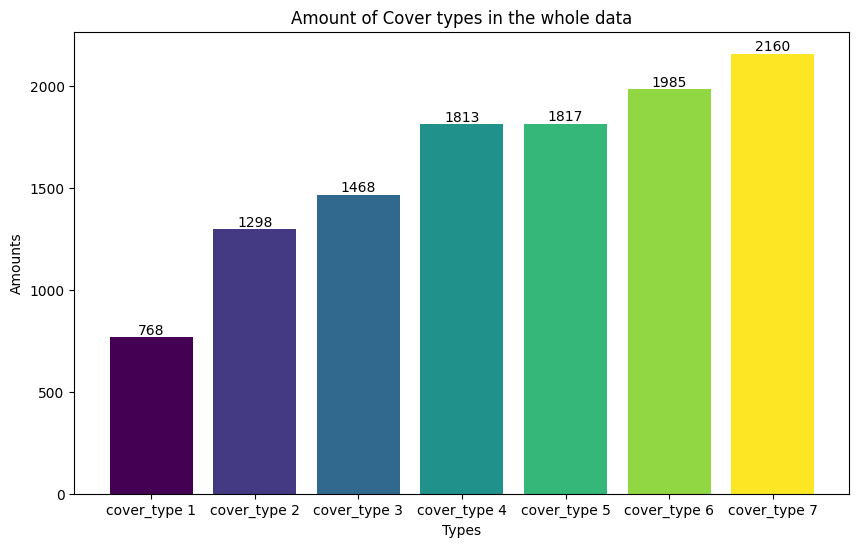

In [19]:
# Plotting a bar chart
x=['cover_type 1' ,'cover_type 2','cover_type 3','cover_type 4','cover_type 5','cover_type 6','cover_type 7']
y=[768 , 1298 ,1468,1813,1817,1985,2160]
# Adding value labels to the bar chart
plt.figure(figsize=(10, 6))
plt.bar_label(plt.bar( x,y, color = cm.viridis(np.linspace(0, 1, len(class_label)))))
plt.title('Amount of Cover types in the whole data')
plt.xlabel('Types')
plt.ylabel('Amounts')
plt.ylim()      # It sets the y-axis limits for a plot to be between 0 and 1
plt.show()

In [20]:
# counts value  target 'Cover_Type'
class_label =ModelTrainData['Cover_Type'].value_counts()
class_label

7    1944
5    1770
3    1618
4    1570
6    1243
2    1068
1     571
Name: Cover_Type, dtype: int64

In [21]:
# search for the uniqe values
for column in train_data.columns:
    print(f"{column} has unique values ({train_data[column].nunique()})")

Id has unique values (8286)
Elevation has unique values (1580)
Aspect has unique values (361)
Slope has unique values (50)
Horizontal_Distance_To_Hydrology has unique values (362)
Vertical_Distance_To_Hydrology has unique values (383)
Horizontal_Distance_To_Roadways has unique values (2443)
Hillshade_9am has unique values (168)
Hillshade_Noon has unique values (132)
Hillshade_3pm has unique values (243)
Horizontal_Distance_To_Fire_Points has unique values (2115)
Wilderness_Area1 has unique values (2)
Wilderness_Area2 has unique values (2)
Wilderness_Area3 has unique values (2)
Wilderness_Area4 has unique values (2)
Soil_Type1 has unique values (2)
Soil_Type2 has unique values (2)
Soil_Type3 has unique values (2)
Soil_Type4 has unique values (2)
Soil_Type5 has unique values (2)
Soil_Type6 has unique values (2)
Soil_Type7 has unique values (1)
Soil_Type8 has unique values (2)
Soil_Type9 has unique values (2)
Soil_Type10 has unique values (2)
Soil_Type11 has unique values (2)
Soil_Type12 

# spliting data

In [22]:
# spliting the data
#train
X_train=train_data.iloc[: , 0:55]
y_train=train_data.iloc[: , 55]
# TEST
X_test=test_data.iloc[: , 0:55]
y_test=test_data.iloc[: , 55]
# validation
X_val=validation_data.iloc[: , 0:55]
y_val=validation_data.iloc[: , 55]

# visualization

**TSNE**

<ipython-input-3-5dbb1f16fb62>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(set(y_data)))  # Change the colormap as needed


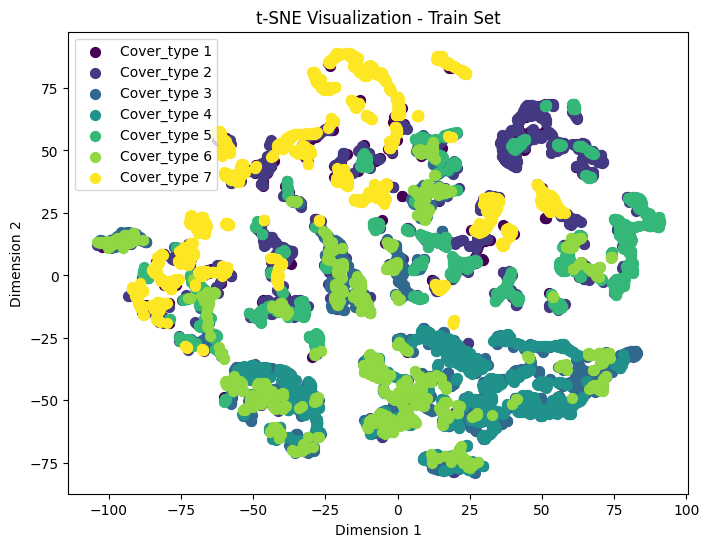

<ipython-input-3-5dbb1f16fb62>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(set(y_data)))  # Change the colormap as needed


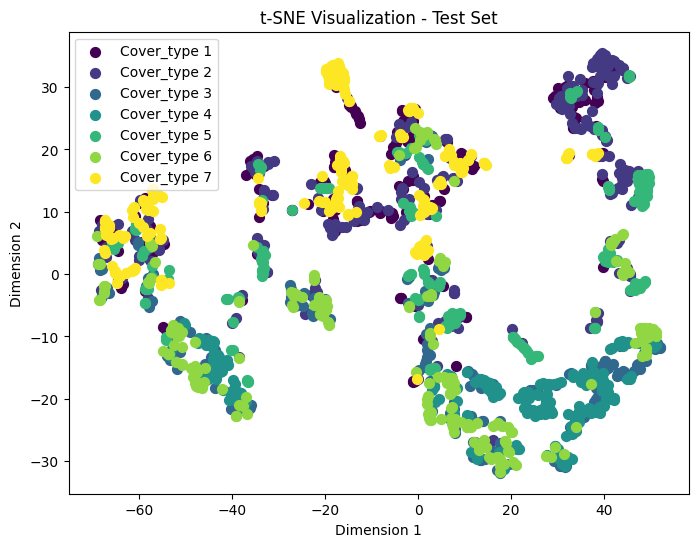

In [23]:
title=['t-SNE Visualization - Train Set','t-SNE Visualization - Test Set']
tens(X_train ,y_train ,title[0])
tens(X_test ,y_test ,title[1])

<ipython-input-24-a85a30034755>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(x=df_hist["Elevation"],ax=ax[0,0])
<ipython-input-24-a85a30034755>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(x=df_hist["Aspect"],ax=ax[0,1])
<ipython-input-24-a85a30034755>:8: UserWarning: 

`dist

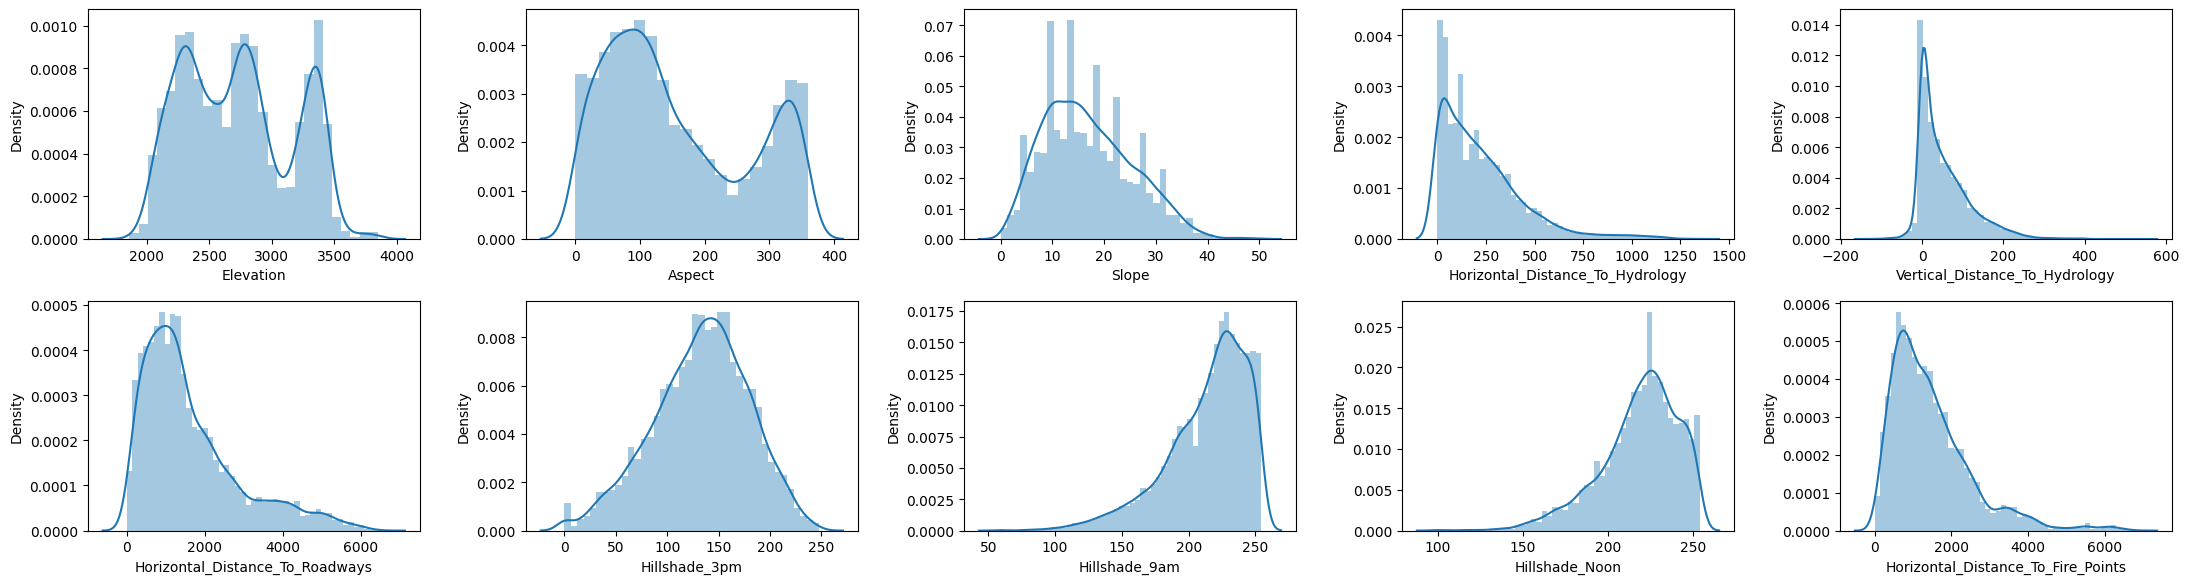

In [24]:
# distribution of training data
fig , ax = plt.subplots(2,5,figsize = (22,6))
df_hist = train_data[["Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Hillshade_3pm","Horizontal_Distance_To_Fire_Points"]]
ax1 = sns.distplot(x=df_hist["Elevation"],ax=ax[0,0])
ax1.set_xlabel("Elevation")
ax2 = sns.distplot(x=df_hist["Aspect"],ax=ax[0,1])
ax2.set_xlabel("Aspect")
ax3 = sns.distplot(x=df_hist["Slope"],ax=ax[0,2])
ax3.set_xlabel("Slope")
ax4 = sns.distplot(x=df_hist["Horizontal_Distance_To_Hydrology"],ax=ax[0,3])
ax4.set_xlabel("Horizontal_Distance_To_Hydrology")
ax5 = sns.distplot(x=df_hist["Vertical_Distance_To_Hydrology"],ax=ax[0,4])
ax5.set_xlabel("Vertical_Distance_To_Hydrology")
ax6 = sns.distplot(x=df_hist["Horizontal_Distance_To_Roadways"],ax=ax[1,0])
ax6.set_xlabel("Horizontal_Distance_To_Roadways")
ax7 = sns.distplot(x=df_hist["Hillshade_3pm"],ax=ax[1,1])
ax7.set_xlabel("Hillshade_3pm")
ax8 = sns.distplot(x=df_hist["Hillshade_9am"],ax=ax[1,2])
ax8.set_xlabel("Hillshade_9am")
ax9 = sns.distplot(x=df_hist["Hillshade_Noon"],ax=ax[1,3])
ax9.set_xlabel("Hillshade_Noon")
ax10 = sns.distplot(x=df_hist["Horizontal_Distance_To_Fire_Points"],ax=ax[1,4])
ax10.set_xlabel("Horizontal_Distance_To_Fire_Points")
plt.tight_layout()
plt.show()


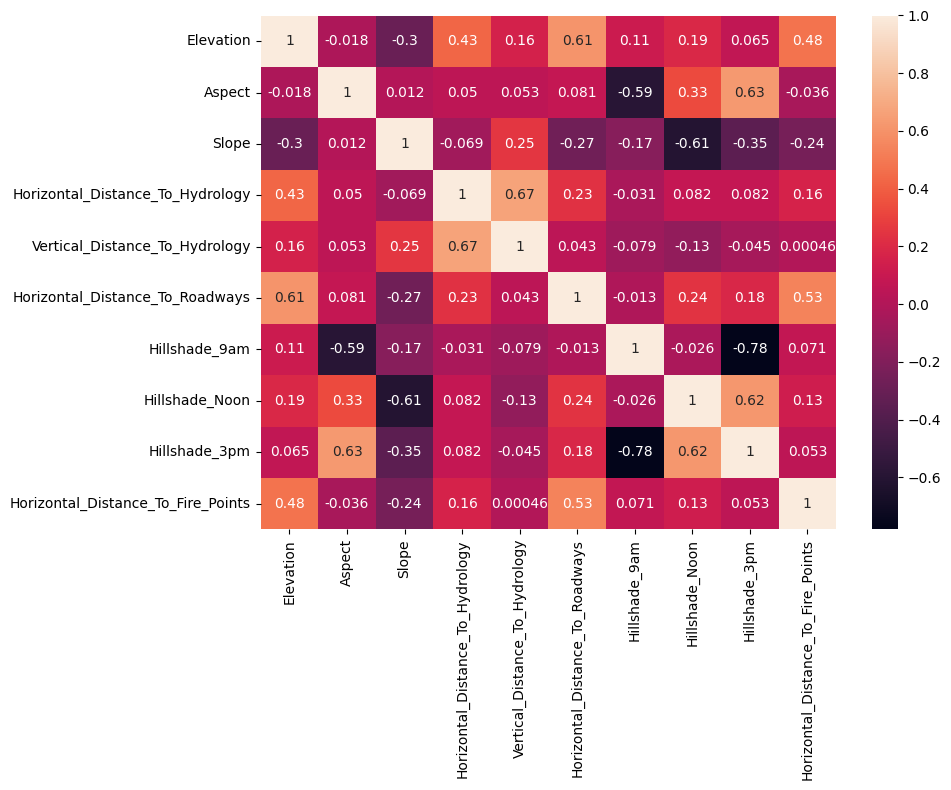

In [25]:
# correlation between features
plt.figure(figsize=(10,8))
sns.heatmap(df_hist.corr(),annot=True)
plt.tight_layout()
plt.show()

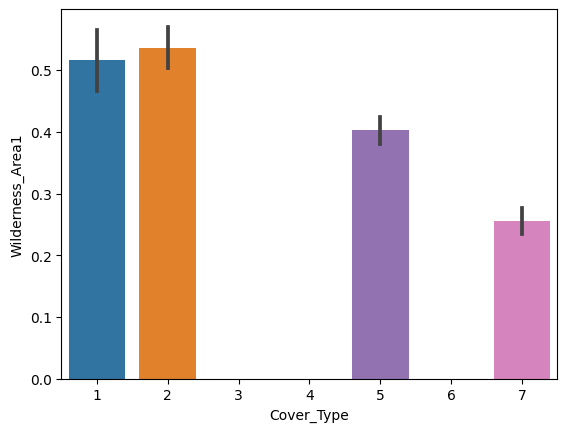

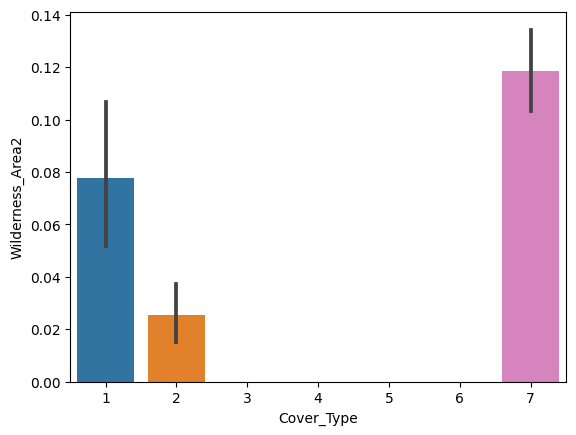

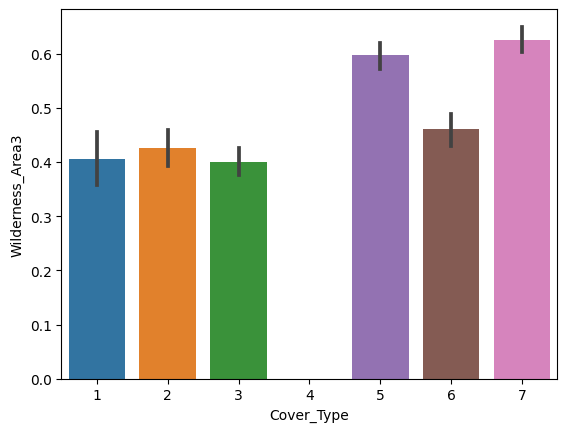

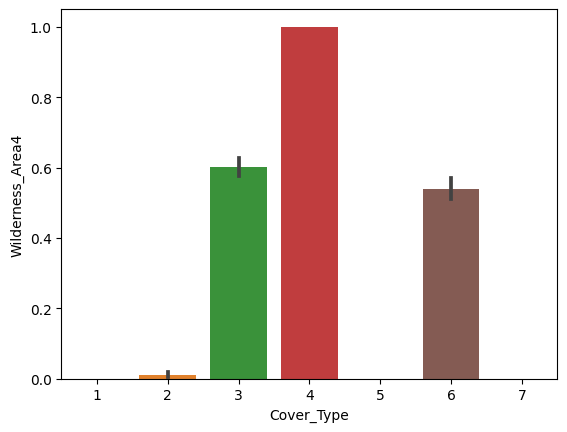

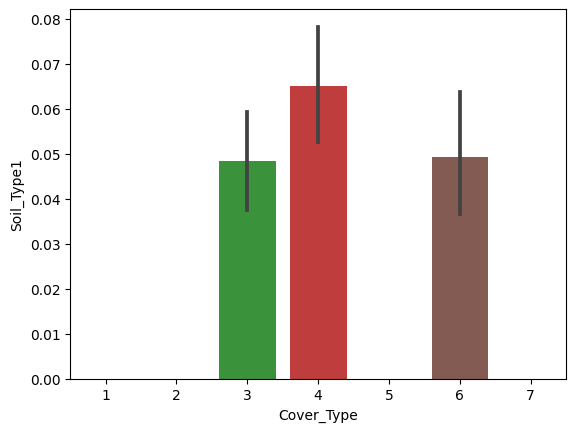

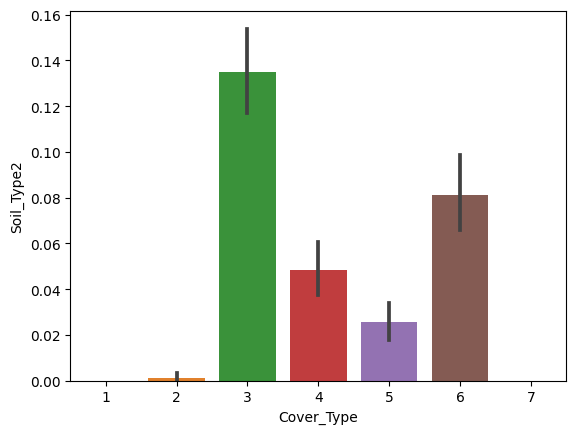

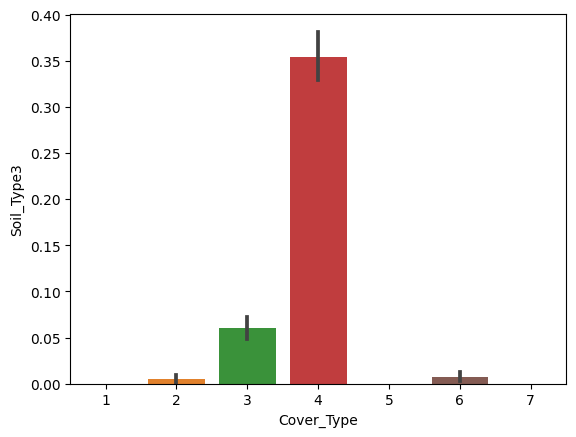

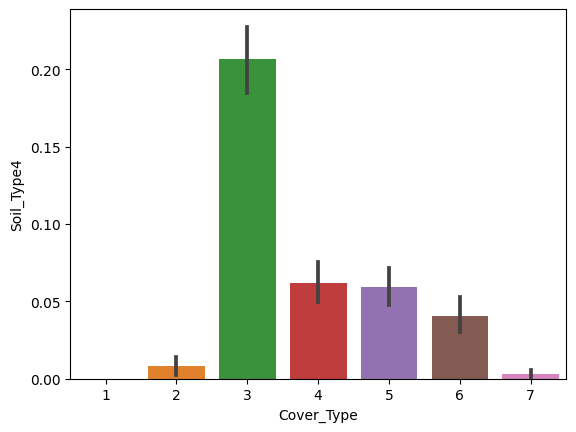

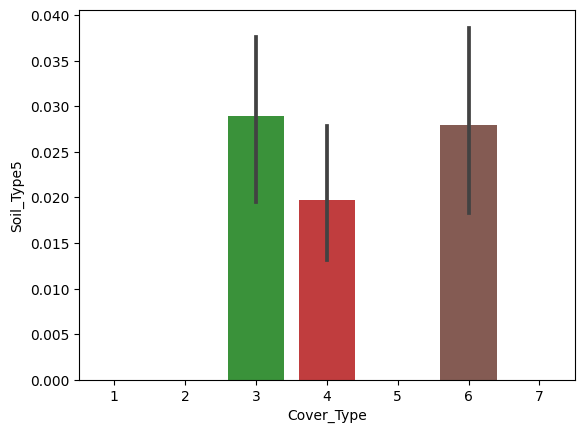

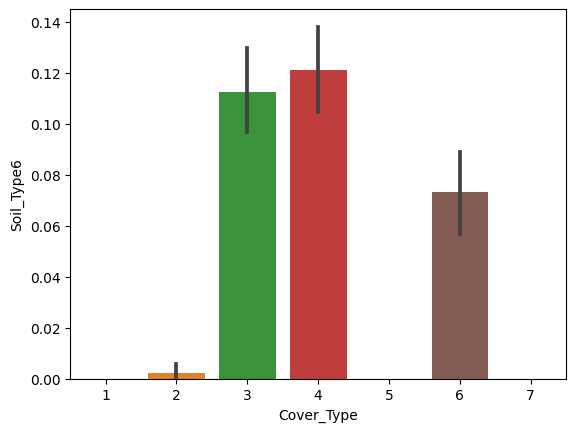

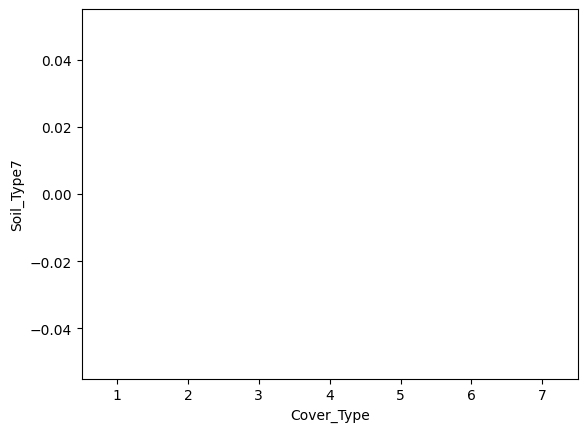

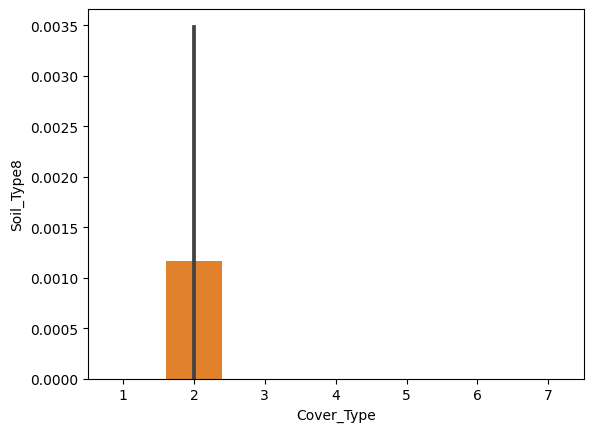

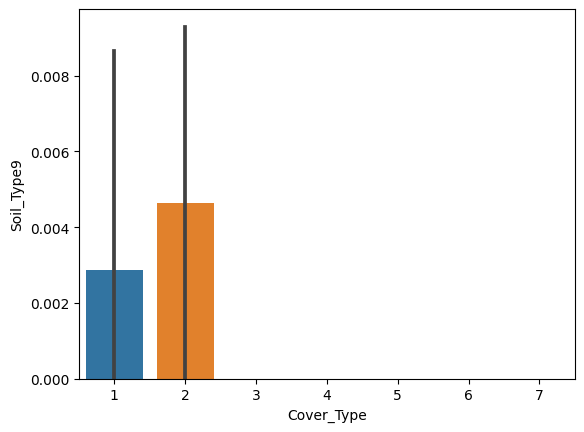

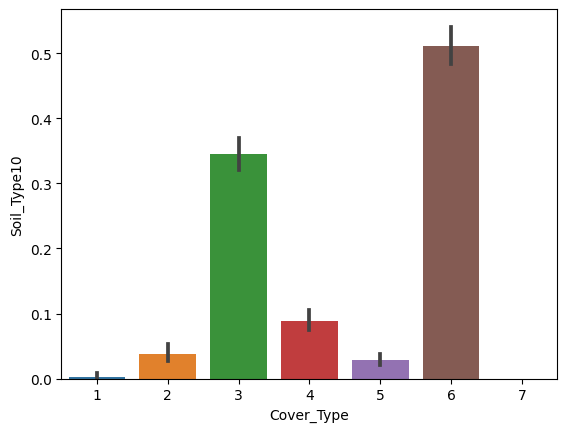

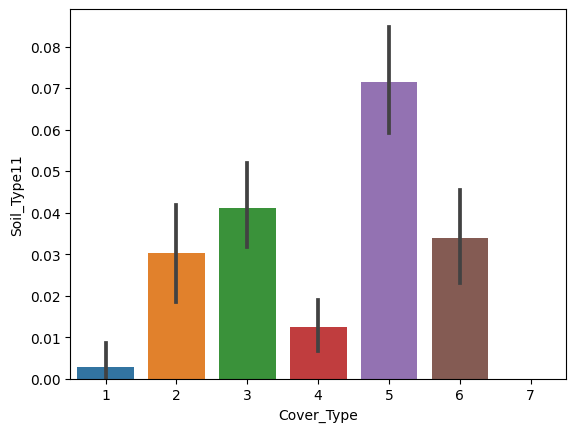

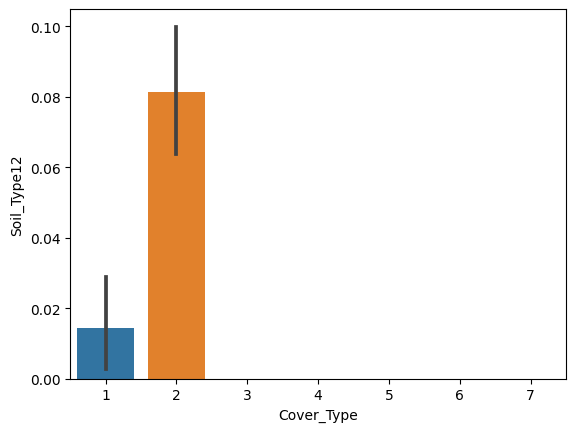

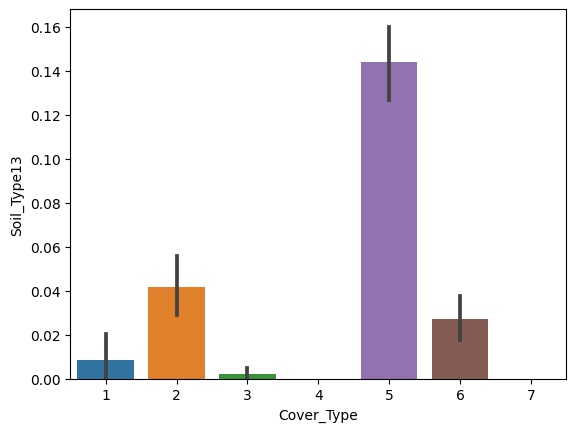

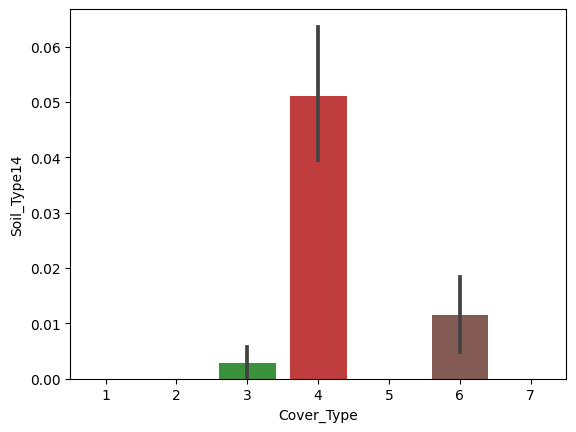

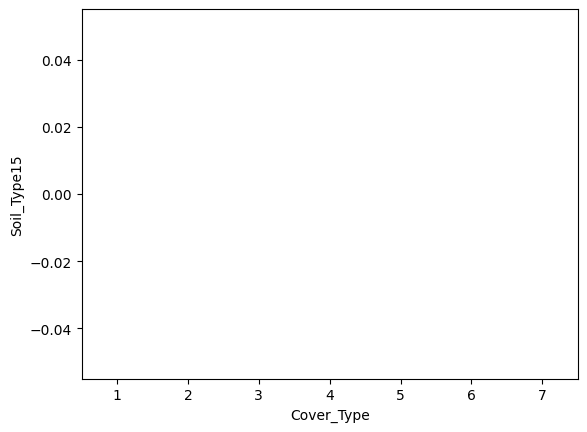

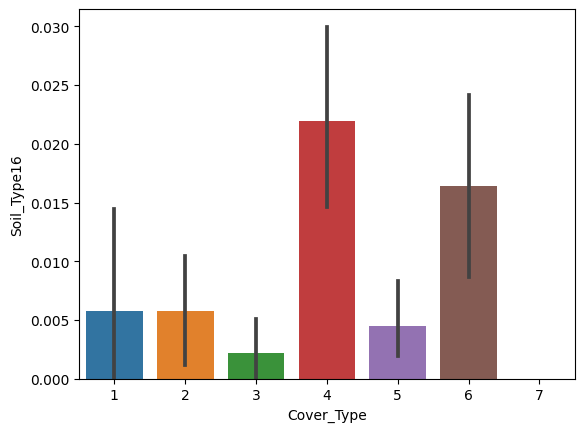

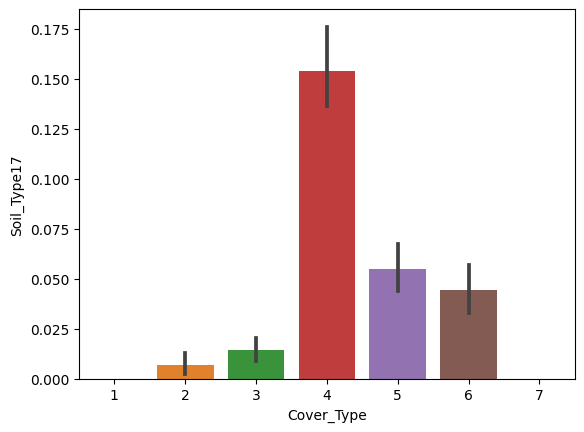

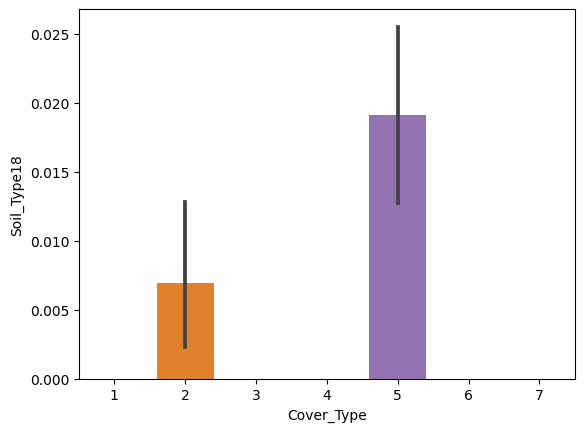

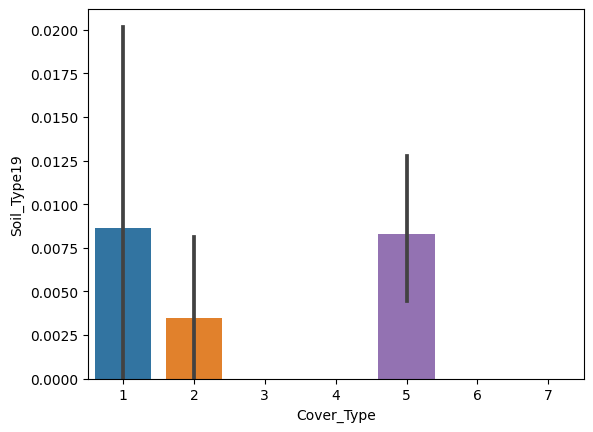

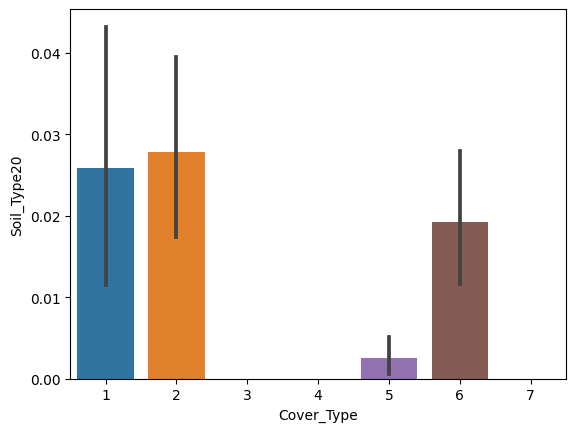

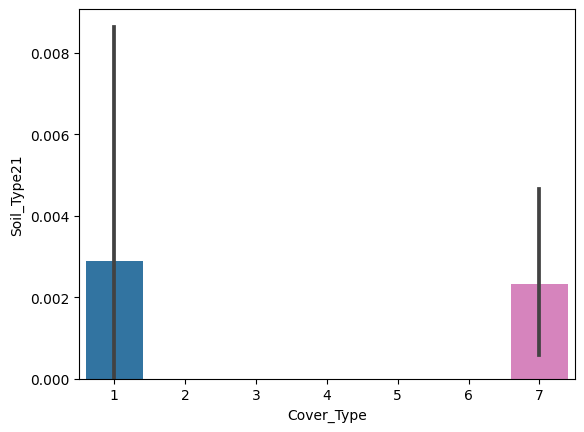

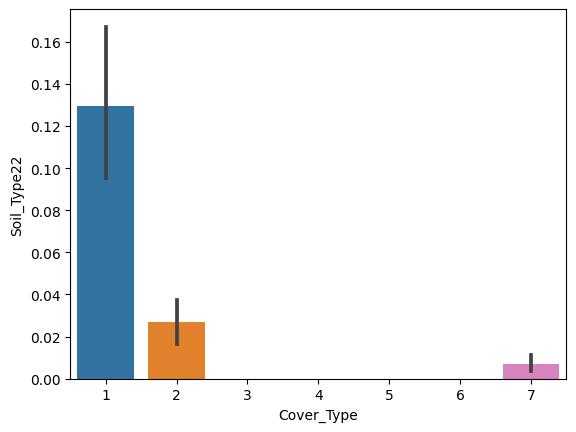

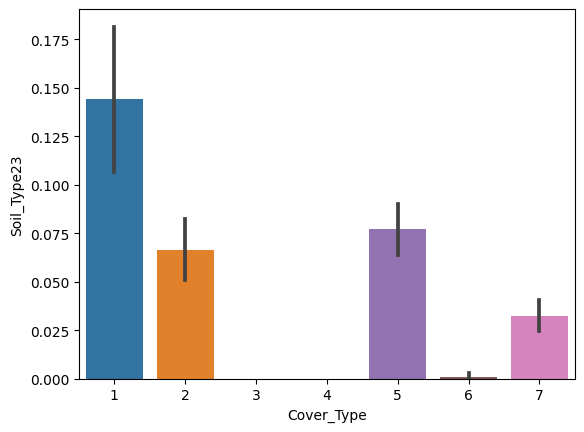

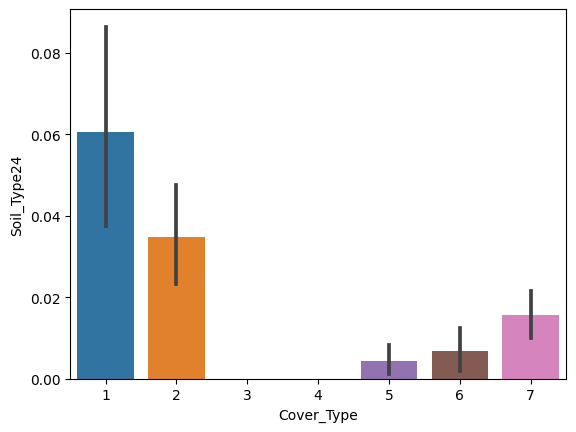

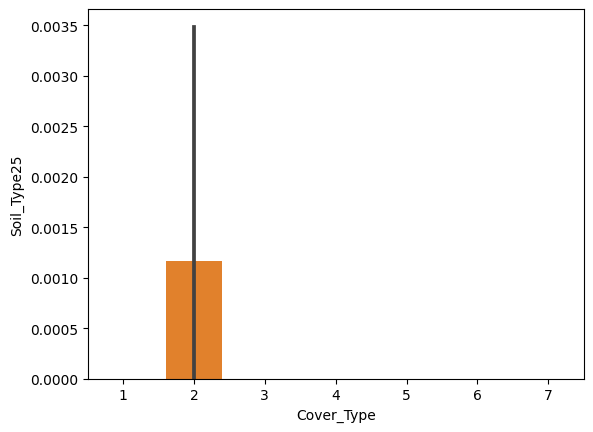

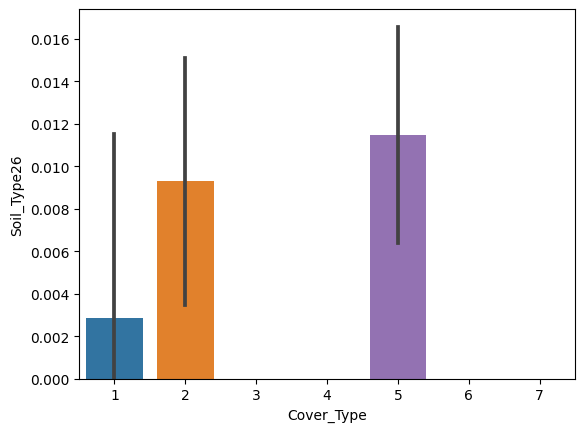

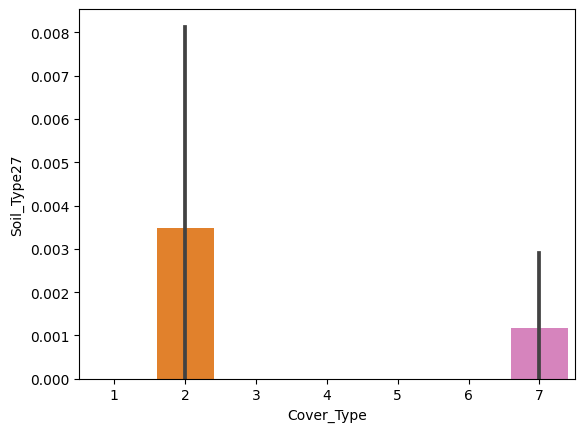

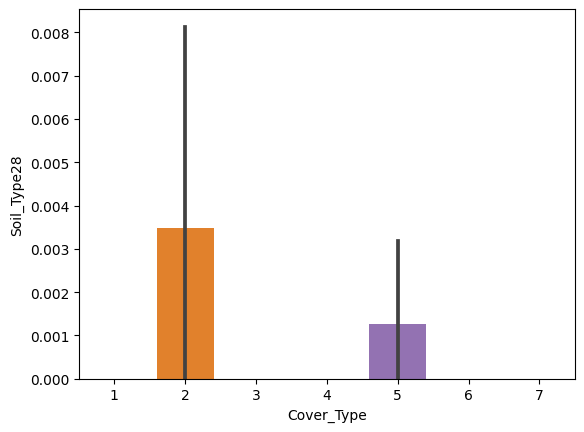

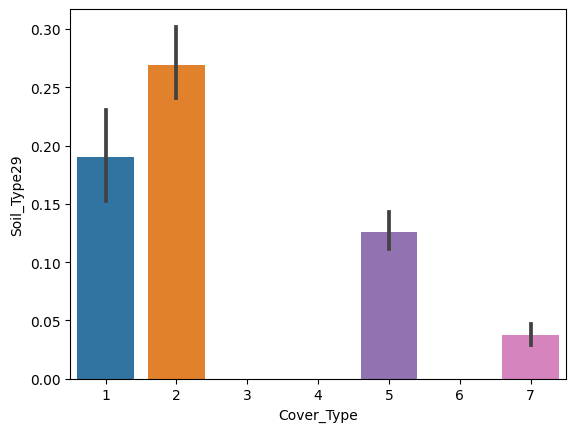

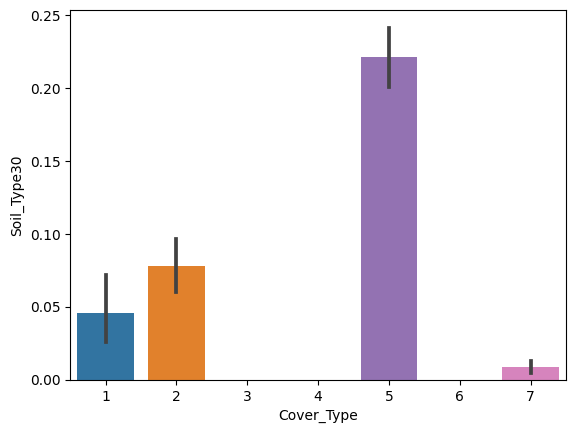

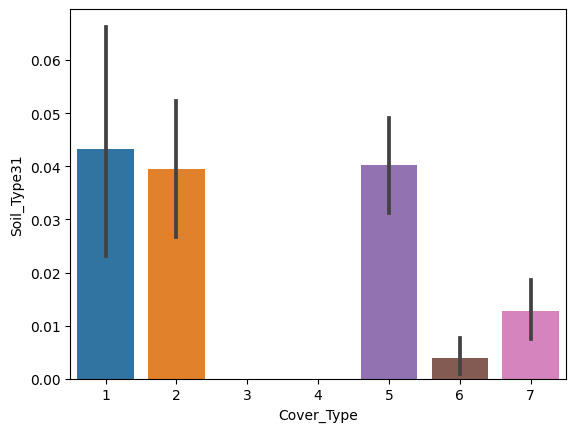

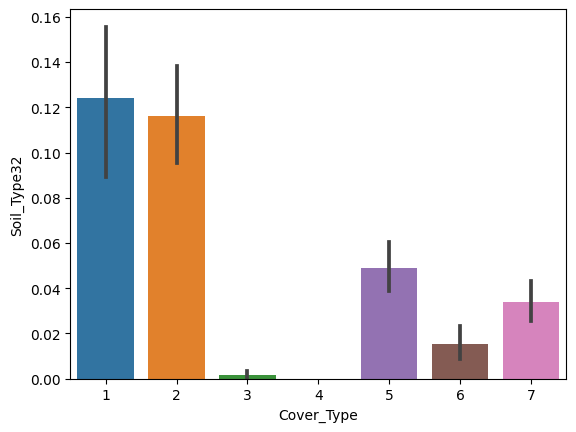

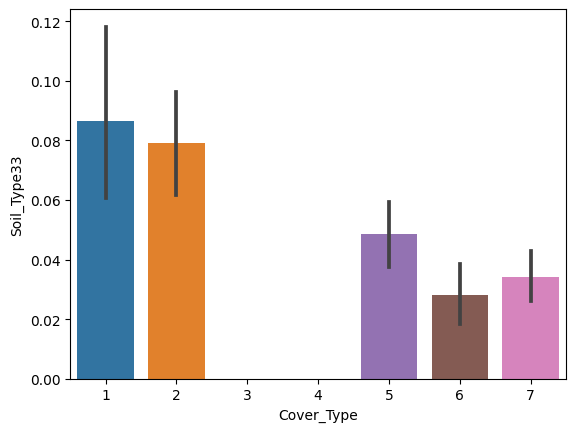

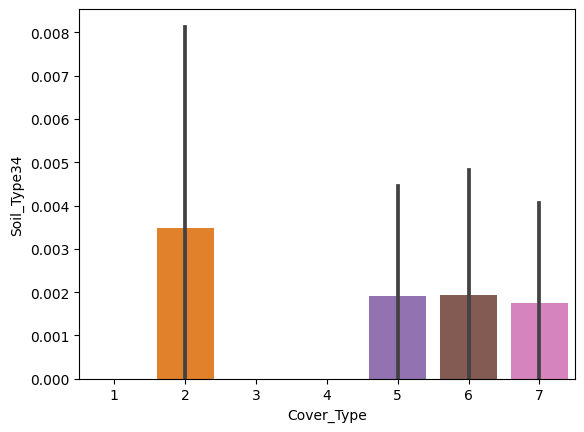

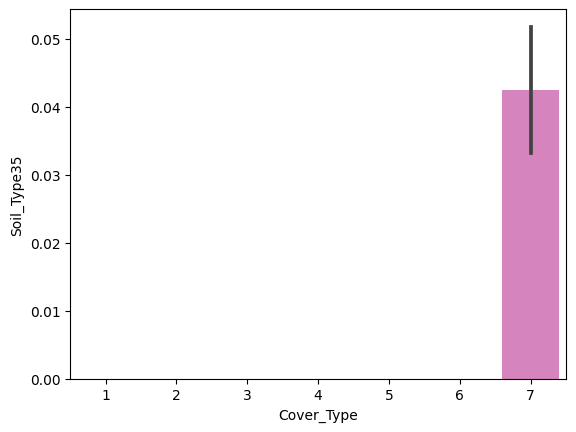

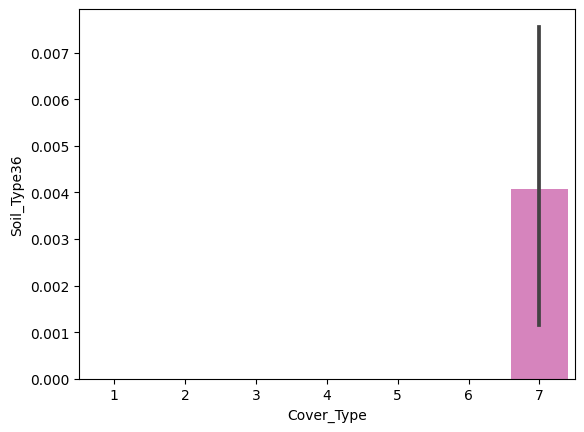

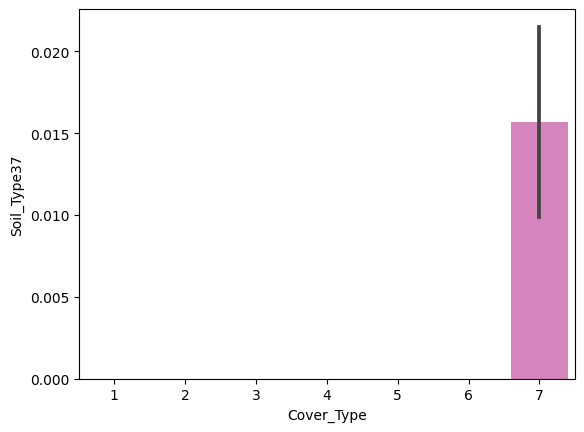

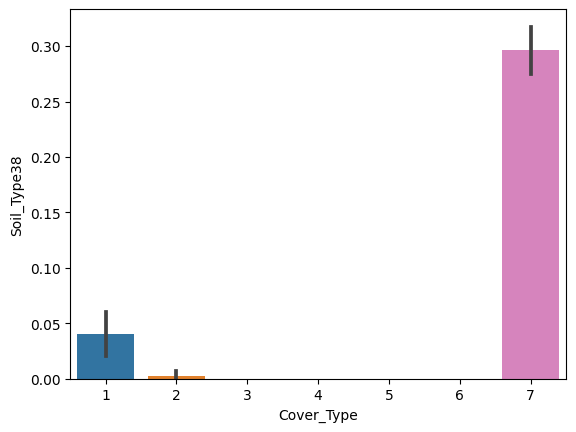

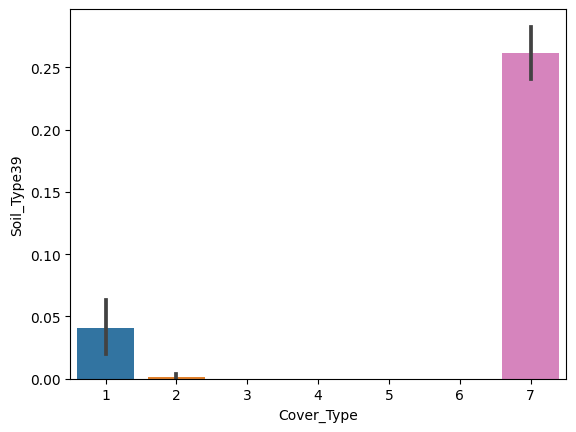

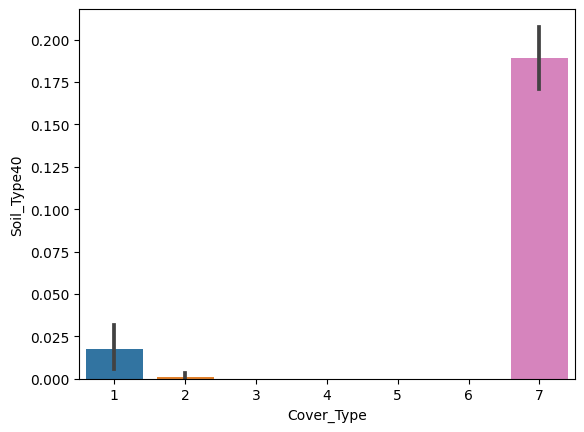

In [26]:
#Every Features with the cover type
for column in train_data.columns[11:-1]:
    sns.barplot(x=train_data["Cover_Type"],y=train_data[column])
    plt.show()

**notes:**


*   soil_type 7  and soil_type 15 is empty
*   soil_type 15 is empty
* soil_type 35, soil_type 36 and soil_type 37 are consedered as  cover_type 7
* soil_type 25 conseders as cover_type 2




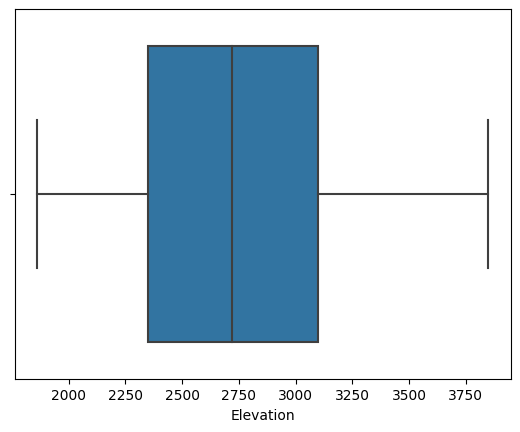

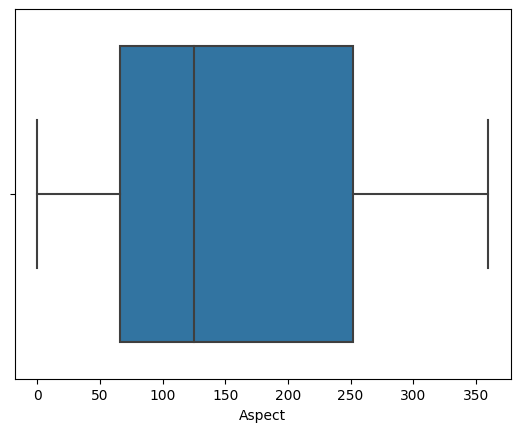

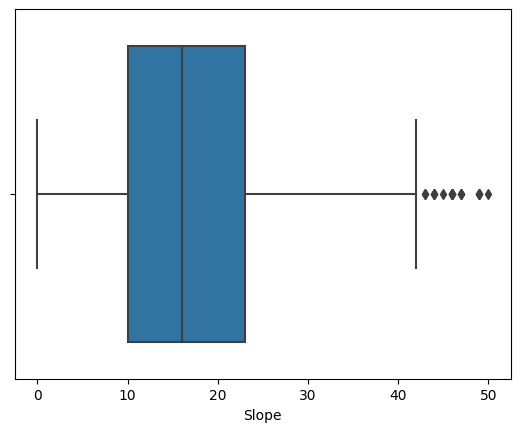

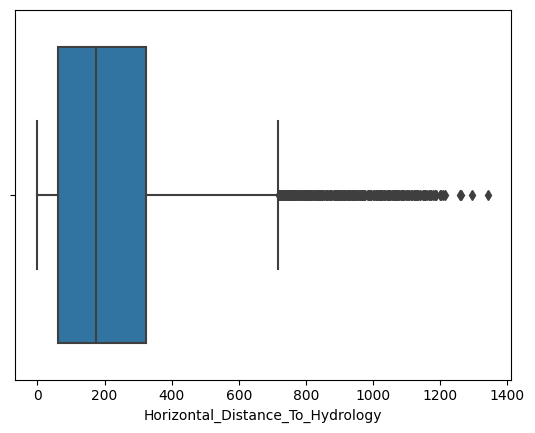

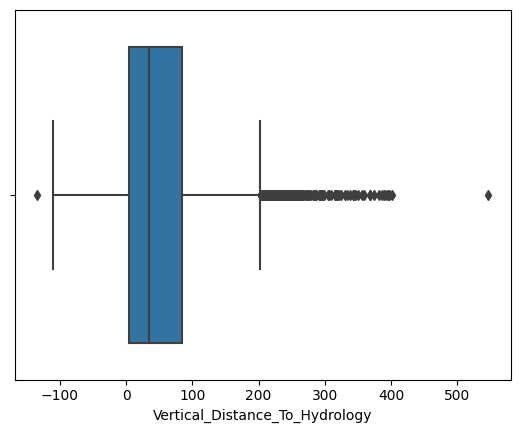

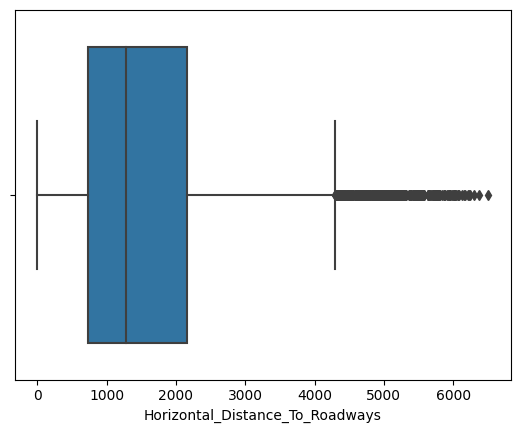

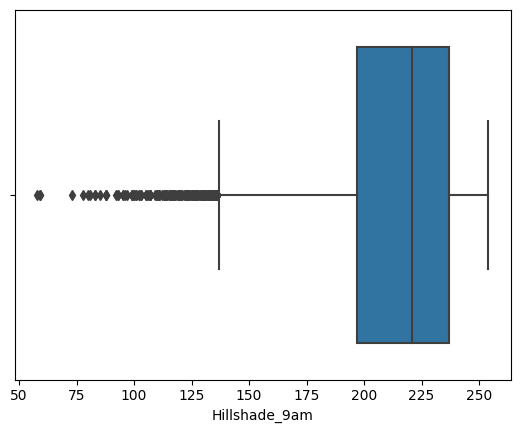

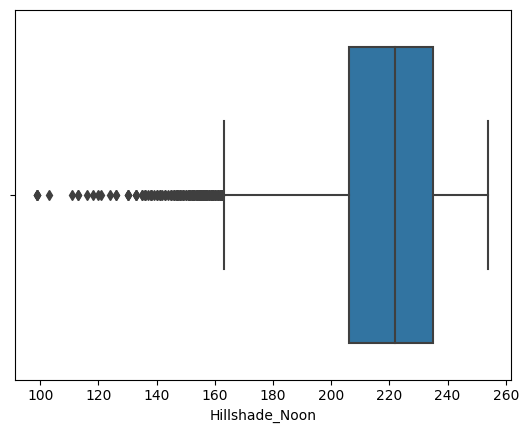

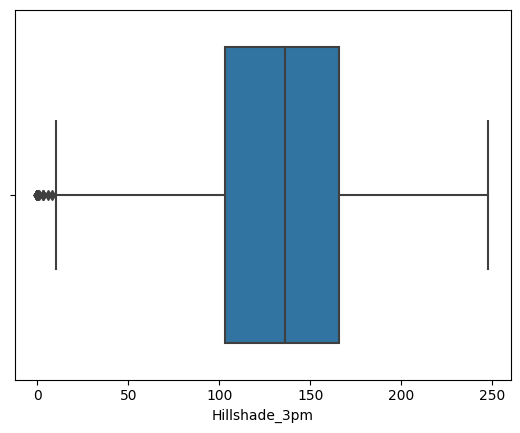

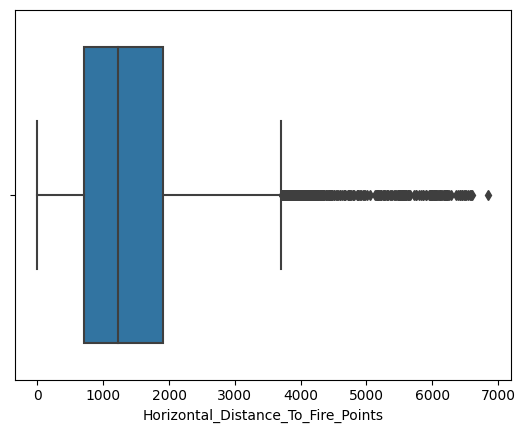

In [27]:
# Detecting the Outliers
for column in df_hist.columns:
    sns.boxplot(x = train_data[column])
    plt.show()

# Modelling

# Supervised learning Approach

**KNN classifier**

In [28]:
# with standardization of the data
#KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None) default
KNNm=KNeighborsClassifier()
KNNm.fit(X_train ,y_train)
KNN_per=KNNm.predict(X_test)
KNN_accuracy=accuracy_score(y_test ,KNN_per)
KNN_conf=confusion_matrix(y_test ,KNN_per)
print("the accuracy of the KNN is :",KNN_accuracy)

the accuracy of the KNN is : 0.7527868852459016


**Logistic Regression**

In [29]:
#LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None) defaults
lr = LogisticRegression()
lr.fit(X_train ,y_train)
lr_per=lr.predict(X_test)
lr_accuracy=accuracy_score(y_test ,lr_per)
lr_conf=confusion_matrix(y_test ,lr_per)
print("the accuracy of the Logistic Regression is :",lr_accuracy)


the accuracy of the Logistic Regression is : 0.38163934426229507


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**SVM**

In [30]:
svm = SVC()
svm.fit(X_train ,y_train)
svm_per=svm.predict(X_test)
svm_accuracy=accuracy_score(y_test ,svm_per)
svm_conf=confusion_matrix(y_test ,svm_per)
print("the accuracy of the SVM is :",svm_accuracy)

the accuracy of the SVM is : 0.4963934426229508


**DecisionTreeClassifier**

In [31]:
#DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train ,y_train)
dt_per=dt.predict(X_test)
dt_accuracy=accuracy_score(y_test ,dt_per)
dt_conf=confusion_matrix(y_test ,dt_per)
print("the accuracy of the DecisionTreeClassifier is :",dt_accuracy)

the accuracy of the DecisionTreeClassifier is : 0.7632786885245901


**Naive Bayes Classifier**

In [32]:
#Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train ,y_train)
nb_per=nb.predict(X_test)
nb_accuracy=accuracy_score(y_test ,nb_per)
nb_conf=confusion_matrix(y_test ,nb_per)
print("the accuracy of the Naive Bayes Classifier is :",nb_accuracy)

the accuracy of the Naive Bayes Classifier is : 0.6498360655737705


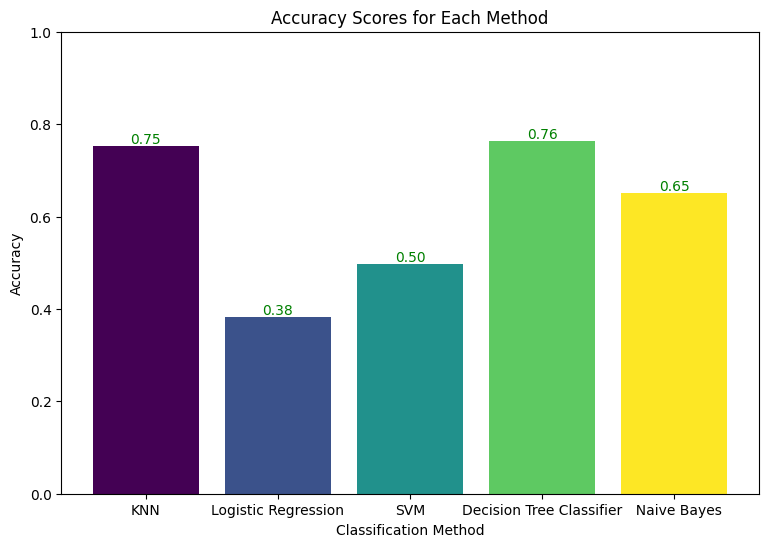

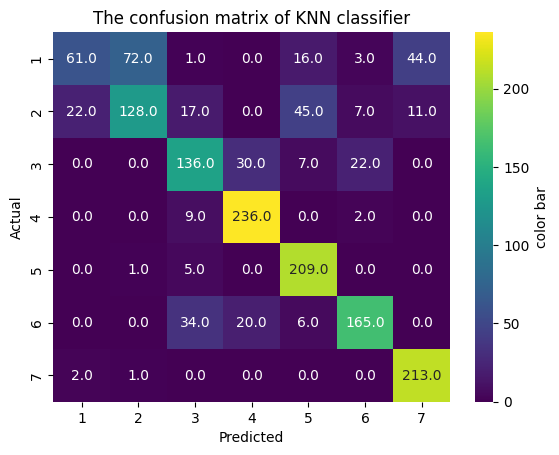

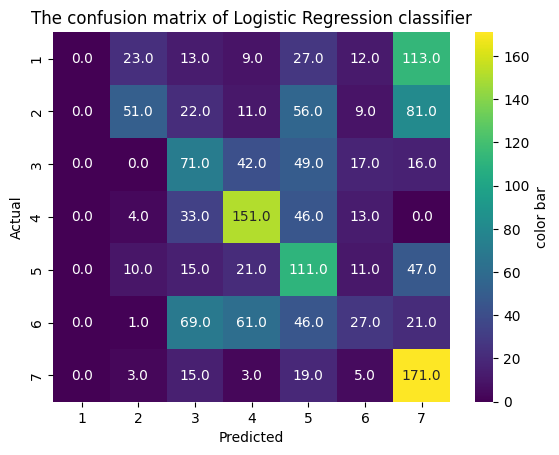

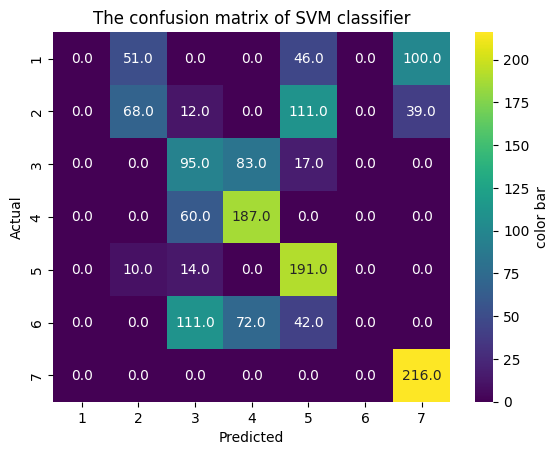

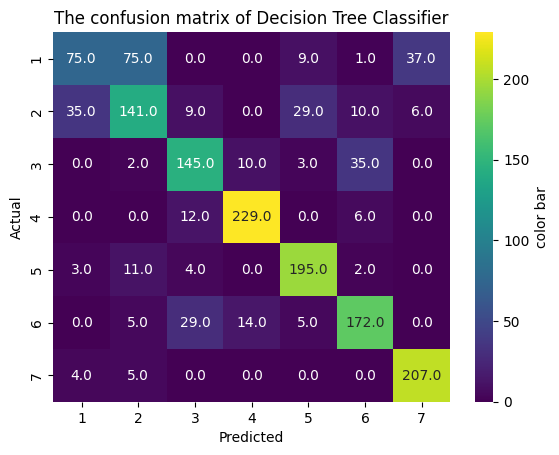

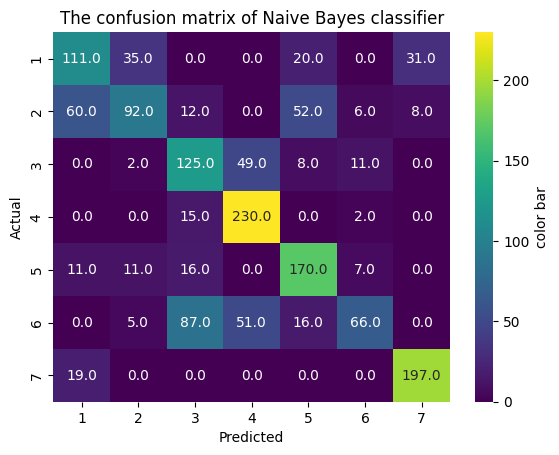

In [33]:
# Plotting a bar chart the accuracy scores
methods = ['KNN', 'Logistic Regression', 'SVM', 'Decision Tree Classifier', '  Naive Bayes']
conv_name = ['The confusion matrix of KNN classifier', 'The confusion matrix of Logistic Regression classifier', 'The confusion matrix of SVM classifier', 'The confusion matrix of Decision Tree Classifier', 'The confusion matrix of Naive Bayes classifier']
accuracies = [KNN_accuracy, lr_accuracy, svm_accuracy, dt_accuracy, nb_accuracy]
confusion_matricxs=[KNN_conf,lr_conf,svm_conf,dt_conf,nb_conf]
# Adding value labels to the bar chart
plt.figure(figsize=(9, 6))
plt.bar_label(plt.bar(methods, accuracies, color = cm.viridis(np.linspace(0, 1, len(accuracies)))), labels=[f"{acc:.2f}" for acc in accuracies], fontsize=10, color="Green")
plt.title('Accuracy Scores for Each Method')
plt.xlabel('Classification Method')
plt.ylabel('Accuracy')
plt.ylim((0, 1))      # It sets the y-axis limits for a plot to be between 0 and 1
plt.show()
for i in range(5):
  plot(confusion_matricxs[i],conv_name[i])

# Feature Engineering with Modelling

# preprocessing of the data

In [34]:
#standarization of data
scale=MinMaxScaler()
#train
X_train_scale =scale.fit_transform(X_train)
# TEST
X_test_scale=scale.transform(X_test)
# THE DATA scaled will be (X_train_scale ,X_test_scale,y_train ,y_test)
# THE DATA with no scalling will be (X_train ,X_test ,y_train ,y_test)


# Filter Method
SelectKBest is a feature selection method .It is used to select the k most important features from the input data based on a specified scoring function.  we will use:

*   the chi-squared (chi2) scoring function.

and apply it into KNN and Decision tree





question2


In [35]:
from sklearn.feature_selection import SelectKBest, chi2

def filter_feature_selection(model, X_train, X_test, y_train, k):
    selector = SelectKBest(score_func=chi2, k=k)
    X_train_filtered = selector.fit_transform(X_train, y_train)
    X_test_filtered = selector.transform(X_test)

    model.fit(X_train_filtered, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_filtered)

    # Calculate accuracy on the test set
    accuracy = accuracy_score(y_test, y_pred)
    return X_train_filtered, X_test_filtered,accuracy,y_pred ,y_train

**Decision tree model**

5 features has accuracy = 0.4
6 features has accuracy = 0.44131147540983606
7 features has accuracy = 0.4701639344262295
8 features has accuracy = 0.5134426229508197
9 features has accuracy = 0.5134426229508197
10 features has accuracy = 0.5232786885245901
11 features has accuracy = 0.5822950819672131
12 features has accuracy = 0.5816393442622951
13 features has accuracy = 0.5940983606557377
14 features has accuracy = 0.5940983606557377
15 features has accuracy = 0.5927868852459016
16 features has accuracy = 0.598688524590164
17 features has accuracy = 0.5973770491803279
18 features has accuracy = 0.6045901639344262
19 features has accuracy = 0.6714754098360656
20 features has accuracy = 0.6911475409836065
21 features has accuracy = 0.6885245901639344
22 features has accuracy = 0.6957377049180328
23 features has accuracy = 0.6891803278688524
24 features has accuracy = 0.6898360655737705
25 features has accuracy = 0.6878688524590164
26 features has accuracy = 0.7540983606557377
27 featu

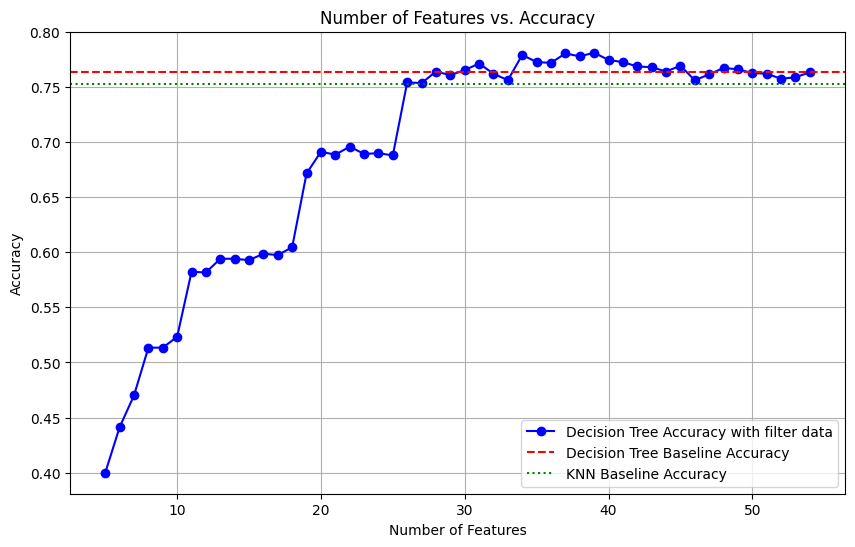

In [36]:
# Assuming you have loaded the data and defined the necessary variables
# X_train_scale, y_train, X_test_scale, y_test, and dt_accuracy
# Initialize a list to store accuracy scores for different feature selection sizes
dt_Baseline=dt_accuracy
KNN_Baseline=KNN_accuracy
d_t_accuracies=[]
number_of_features = 54
best_accuracy_dt_filter = 0
best_num_features_dt_filter = 0

# Loop through different numbers of features from 5 to 55
for num_features in range(5, number_of_features+1):
    # Perform feature selection
    model = DecisionTreeClassifier(random_state=42)  # Default Decision Tree model
    X_train_filtered, X_test_filtered,accuracy,y_pred,y_train_ = filter_feature_selection(model, X_train_scale, X_test_scale, y_train, num_features)

    d_t_accuracies.append(accuracy)
    print(num_features, "features has accuracy =", accuracy)
    # Store the best feature subset
    if accuracy > best_accuracy_dt_filter:
        best_accuracy_dt_filter = accuracy
        best_num_features_dt_filter = num_features

# Get the best feature subset using the number of features that achieved the best accuracy
model = DecisionTreeClassifier(random_state=42)
X_train_best_subset_dt_filter, X_test_best_subset_dt_filter,best_accuracy_dt_filter,BEST_y_pred_DT_Filter,y_train_DT_filter = filter_feature_selection(model, X_train_scale, X_test_scale, y_train, best_num_features_dt_filter)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(range(5, number_of_features+1), d_t_accuracies, marker='o', linestyle='-', color='b', label='Decision Tree Accuracy with filter data')
plt.axhline(y=dt_Baseline, color='r', linestyle='--', label='Decision Tree Baseline Accuracy')
plt.axhline(y=KNN_Baseline, color='g', linestyle='dotted', label='KNN Baseline Accuracy ')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Number of Features vs. Accuracy')
plt.legend()
plt.grid(True)
plt.show()


The confision Matrics for the best decision tree model with filtered data"
  [[ 84  70   0   0   9   1  33]
 [ 32 146   6   0  36   6   4]
 [  0   1 148  11   6  29   0]
 [  0   0  15 229   0   3   0]
 [  2  10   3   0 200   0   0]
 [  0   4  30  10   8 173   0]
 [  3   2   0   0   0   0 211]]


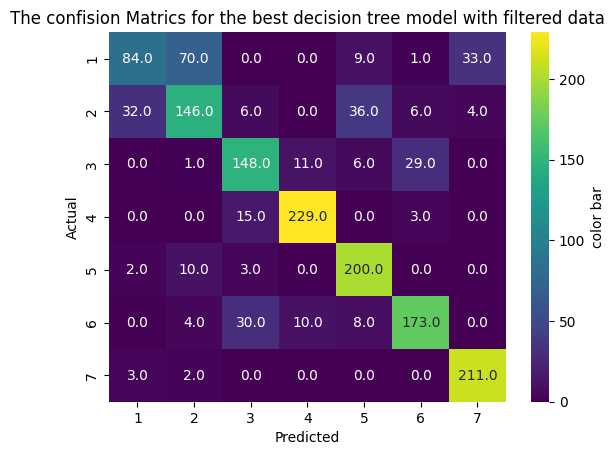

In [37]:
#Plot The confision Matrics for the best decision tree model with filtered data
conf_DT_FILTER=confusion_matrix(y_test, BEST_y_pred_DT_Filter)
print('The confision Matrics for the best decision tree model with filtered data"\n ',conf_DT_FILTER)
title='The confision Matrics for the best decision tree model with filtered data'
plot(conf_DT_FILTER,title)

**KNN model**

5 features has accuracy = 0.17573770491803278
6 features has accuracy = 0.17573770491803278
7 features has accuracy = 0.20131147540983607
8 features has accuracy = 0.20131147540983607
9 features has accuracy = 0.20131147540983607
10 features has accuracy = 0.20262295081967213
11 features has accuracy = 0.6091803278688525
12 features has accuracy = 0.6118032786885246
13 features has accuracy = 0.6334426229508197
14 features has accuracy = 0.6334426229508197
15 features has accuracy = 0.6327868852459017
16 features has accuracy = 0.6419672131147541
17 features has accuracy = 0.6419672131147541
18 features has accuracy = 0.6445901639344263
19 features has accuracy = 0.719344262295082
20 features has accuracy = 0.7291803278688525
21 features has accuracy = 0.7324590163934426
22 features has accuracy = 0.7363934426229508
23 features has accuracy = 0.7363934426229508
24 features has accuracy = 0.7377049180327869
25 features has accuracy = 0.741639344262295
26 features has accuracy = 0.775081

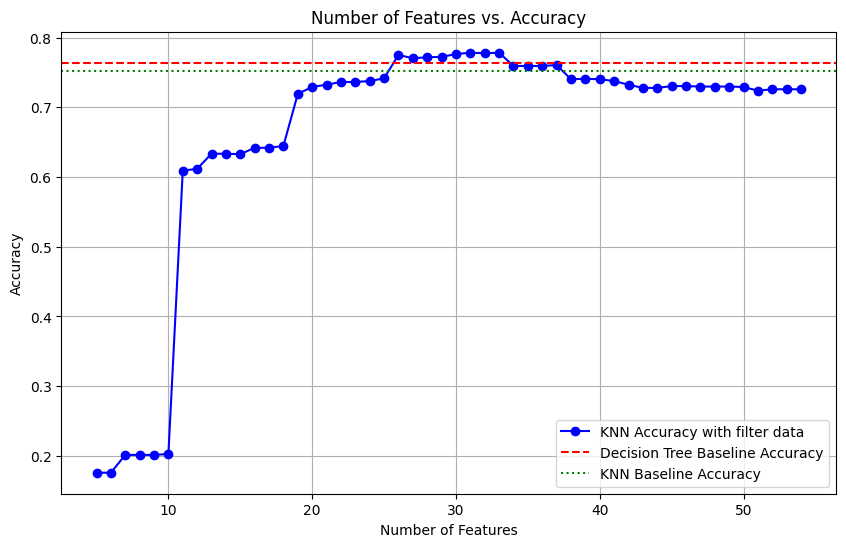

In [38]:
# Assuming you have loaded the data and defined the necessary variables
# X_train_scale, y_train, X_test_scale, y_test, and dt_accuracy

# Initialize a list to store accuracy scores for different feature selection sizes
dt_Baseline=dt_accuracy
KNN_Baseline=KNN_accuracy
knn_accuracies=[]
number_of_features = 54
best_accuracy_knn_filter = 0
best_num_features_knn_filter = 0

# Loop through different numbers of features from 5 to number_of_features
for num_features in range(5, number_of_features + 1):
    # Perform feature selection
    model = KNeighborsClassifier()  # Default KNN model
    X_train_filtered, X_test_filtered, accuracy,y_pred,y_train_KNN = filter_feature_selection(model, X_train_scale, X_test_scale, y_train, num_features)


    knn_accuracies.append(accuracy)
    print(num_features, "features has accuracy =", accuracy)


    # Store the best feature subset
    if accuracy > best_accuracy_knn_filter:
        best_accuracy_knn_filter = accuracy
        best_num_features_knn_filter = num_features

model = KNeighborsClassifier()
X_train_best_subset_knn_filter, X_test_best_subset_knn_filter,best_accuracy_knn_filter,BEST_y_pred_KNN_Filter,y_train_KNN_best = filter_feature_selection(model, X_train_scale, X_test_scale, y_train, best_num_features_knn_filter)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(range(5, number_of_features + 1), knn_accuracies, marker='o', linestyle='-', color='b', label='KNN Accuracy with filter data')
plt.axhline(y=dt_Baseline, color='r', linestyle='--', label='Decision Tree Baseline Accuracy')
plt.axhline(y=KNN_Baseline, color='g', linestyle='dotted', label='KNN Baseline Accuracy ')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Number of Features vs. Accuracy')
plt.legend()
plt.grid(True)
plt.show()


The confision Matrics for the best KNN model with filtered data"
  [[ 79  73   0   0  15   0  30]
 [ 26 133  10   0  46   9   6]
 [  0   0 150  23   4  18   0]
 [  0   0   6 238   0   3   0]
 [  0   4   6   0 204   1   0]
 [  0   3  26  19   3 174   0]
 [  4   3   0   0   0   0 209]]


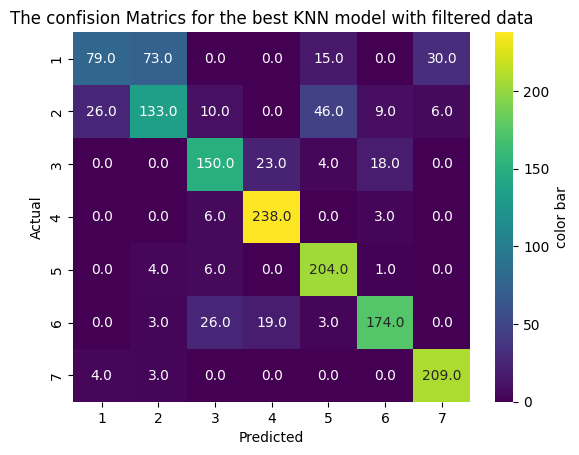

In [39]:
#Plot The confision Matrics for the best KNN model with filtered data
conf_knn_FILTER=confusion_matrix(y_test, BEST_y_pred_KNN_Filter)
print('The confision Matrics for the best KNN model with filtered data"\n ',conf_knn_FILTER)
title='The confision Matrics for the best KNN model with filtered data'
plot(conf_knn_FILTER,title)

# to easy run wrapper we select some features only,use it to run code faster

best accuracy is:  0.6911475409836065 when number of features is: 5
best accuracy is:  0.6970491803278689 when number of features is: 6
best accuracy is:  0.7291803278688525 when number of features is: 7
best accuracy is:  0.7291803278688525 when number of features is: 7
best accuracy is:  0.7291803278688525 when number of features is: 7
best accuracy is:  0.7350819672131148 when number of features is: 10
best accuracy is:  0.7475409836065574 when number of features is: 11
best accuracy is:  0.7475409836065574 when number of features is: 11
best accuracy is:  0.7475409836065574 when number of features is: 11
best accuracy is:  0.7547540983606558 when number of features is: 14
best accuracy is:  0.7547540983606558 when number of features is: 14


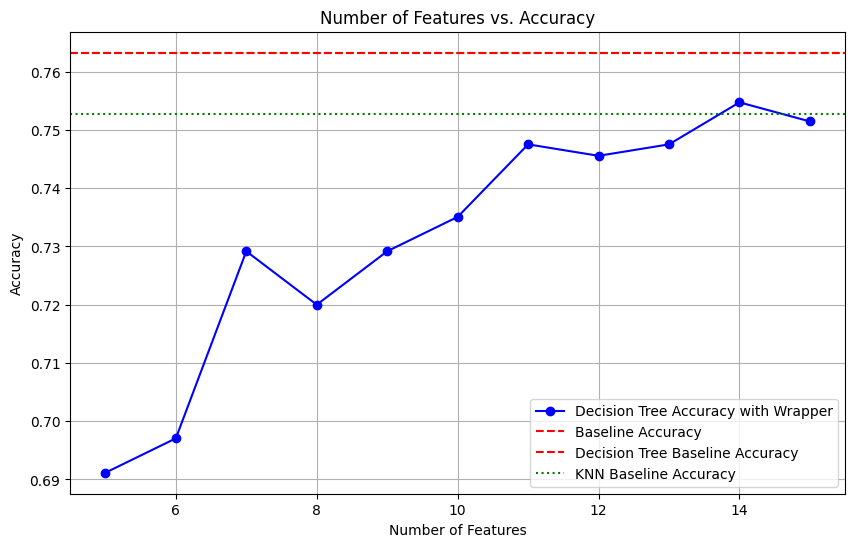

In [ ]:
# Initialize a list to store accuracy scores for different feature selection sizes
dt_Baseline=dt_accuracy
KNN_Baseline=KNN_accuracy
d_t_accuracies_wrap = []
number_of_features = 15
best_accuracy_dt_wrapper = 0
best_num_features_dt_wrapper = 0

# Loop through different numbers of features from 5 to 55
for num_features in range(5, number_of_features+1):
    # Perform feature selection
    model = DecisionTreeClassifier(random_state=42)  # Default Decision Tree model
    X_train_filtered, X_test_filtered,accuracy,y_pred = wrapper_feature_selection(model, X_train_scale, X_test_scale, y_train, num_features)

    d_t_accuracies_wrap.append(accuracy)

    # Store the best feature subset
    if accuracy > best_accuracy_dt_wrapper:
        best_accuracy_dt_wrapper = accuracy
        best_num_features_dt_wrapper = num_features
    print("best accuracy is: ",best_accuracy_dt_wrapper, "when number of features is:", best_num_features_dt_wrapper)
# Get the best feature subset using the number of features that achieved the best accuracy
model = DecisionTreeClassifier(random_state=42)
X_train_best_subset_dt_wrapper, X_test_best_subset_dt_wrapper,best_accuracy_dt_wrapper,BEST_y_pred_Dt_wrapper  = wrapper_feature_selection(model, X_train_scale, X_test_scale, y_train, best_num_features_dt_wrapper)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(range(5, number_of_features+1), d_t_accuracies_wrap, marker='o', linestyle='-', color='b', label='Decision Tree Accuracy with Wrapper')
plt.axhline(y=dt_accuracy, color='r', linestyle='--', label='Baseline Accuracy')
plt.axhline(y=dt_Baseline, color='r', linestyle='--', label='Decision Tree Baseline Accuracy')
plt.axhline(y=KNN_Baseline, color='g', linestyle='dotted', label='KNN Baseline Accuracy ')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Number of Features vs. Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
BEST_y_pred_Dt_wrapper

array([3, 3, 1, ..., 5, 4, 4])

The confision Matrics for the best decision tree model with wrapper data"
  [[ 71  75   0   0   6   1  44]
 [ 34 146  12   0  26   7   5]
 [  0   4 141  14   3  33   0]
 [  0   0  15 228   0   4   0]
 [  0  13   6   0 195   1   0]
 [  1   5  40  14   4 161   0]
 [  3   4   0   0   0   0 209]]


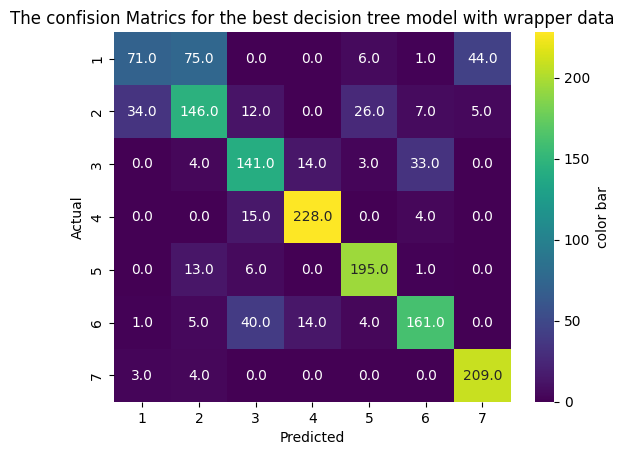

In [ ]:
#Plot The confision Matrics for the best decision tree model with filtered data
conf_DT_wrapper=confusion_matrix(y_test, BEST_y_pred_Dt_wrapper)
print('The confision Matrics for the best decision tree model with wrapper data"\n ',conf_DT_wrapper)
title='The confision Matrics for the best decision tree model with wrapper data'
plot(conf_DT_wrapper,title)

In [ ]:
dataset1 = pd.DataFrame({
    "Decision Tree (Filter)": {"X_train": X_train_best_subset_dt_filter, "X_test": X_test_best_subset_dt_filter, "accuracy": best_accuracy_dt_filter, "num_features": best_num_features_dt_filter},
    "KNN (Filter)": {"X_train": X_train_best_subset_knn_filter, "X_test": X_test_best_subset_knn_filter, "accuracy": best_accuracy_knn_filter, "num_features": best_num_features_knn_filter},
    "Decision Tree (Wrapper)": {"X_train": X_train_best_subset_dt_wrapper, "X_test": X_test_best_subset_dt_wrapper, "accuracy": best_accuracy_dt_wrapper, "num_features": best_num_features_dt_wrapper} })

In [ ]:
dataset1

Decision Tree (Filter)  \
X_train       [[0.5417686354917653, 0.5604229607250755, 0.46...   
X_test        [[0.5558568688405318, 0.4833836858006042, 0.4,...   
accuracy                                               0.780984   
num_features                                                 39   

                                                   KNN (Filter)  \
X_train       [[0.5604229607250755, 0.07073715562174236, 0.3...   
X_test        [[0.4833836858006042, 0.426656738644825, 0.400...   
accuracy                                               0.778361   
num_features                                                 31   

                                        Decision Tree (Wrapper)  
X_train       [[0.5417686354917653, 0.5604229607250755, 0.23...  
X_test        [[0.5558568688405318, 0.4833836858006042, 0.28...  
accuracy                                               0.754754  
num_features                                                 14

In [ ]:
dataset1.to_csv('simi_filtered_data.csv')

best accuracy is:  0.7672131147540984 when number of features is: 5
best accuracy is:  0.7704918032786885 when number of features is: 6
best accuracy is:  0.7750819672131147 when number of features is: 7
best accuracy is:  0.7757377049180327 when number of features is: 8
best accuracy is:  0.7777049180327869 when number of features is: 9
best accuracy is:  0.7777049180327869 when number of features is: 9
best accuracy is:  0.7777049180327869 when number of features is: 9
best accuracy is:  0.7777049180327869 when number of features is: 9
best accuracy is:  0.7777049180327869 when number of features is: 9
best accuracy is:  0.7777049180327869 when number of features is: 9
best accuracy is:  0.7777049180327869 when number of features is: 9


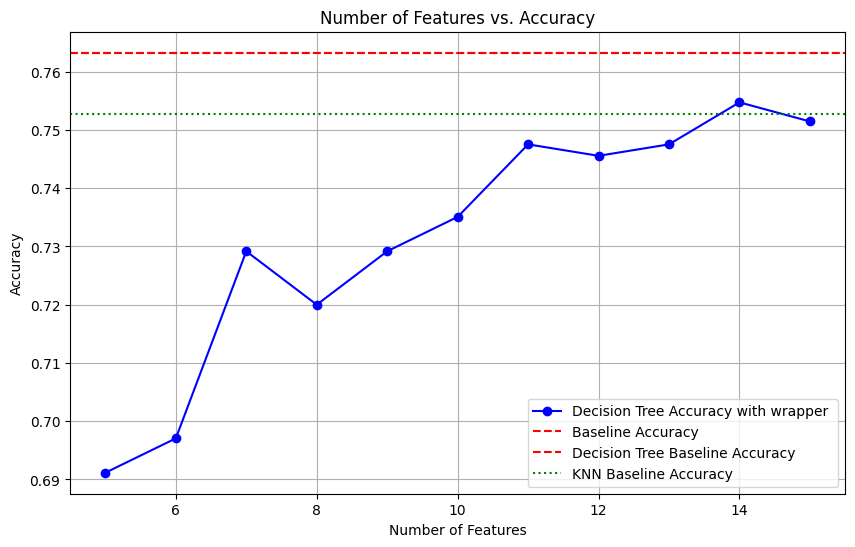

In [ ]:
# Initialize a list to store accuracy scores for different feature selection sizes
dt_Baseline=dt_accuracy
KNN_Baseline=KNN_accuracy
Knn_accuracies_wrap = []
number_of_features = 15
best_accuracy_knn_wrapper = 0
best_num_features_knn_wrapper = 0

# Loop through different numbers of features from 5 to 55
for num_features in range(5, number_of_features+1):
    # Perform feature selection
    model = KNeighborsClassifier()  # Default Decision Tree model
    X_train_filtered, X_test_filtered,accuracy,y_pred = wrapper_feature_selection(model, X_train_scale, X_test_scale, y_train, num_features)

    Knn_accuracies_wrap.append(accuracy)

    # Store the best feature subset
    if accuracy > best_accuracy_knn_wrapper:
        best_accuracy_knn_wrapper = accuracy
        best_num_features_knn_wrapper = num_features
    print("best accuracy is: ",best_accuracy_knn_wrapper, "when number of features is:", best_num_features_knn_wrapper)
# Get the best feature subset using the number of features that achieved the best accuracy
model = KNeighborsClassifier()
X_train_best_subset_knn_wrapper, X_test_best_subset_knn_wrapper,best_accuracy_knn_wrapper,BEST_y_pred_KNN_wrapper  = wrapper_feature_selection(model, X_train_scale, X_test_scale, y_train, best_num_features_knn_wrapper)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(range(5, number_of_features+1), d_t_accuracies_wrap, marker='o', linestyle='-', color='b', label='Decision Tree Accuracy with wrapper ')
plt.axhline(y=dt_accuracy, color='r', linestyle='--', label='Baseline Accuracy')
plt.axhline(y=dt_Baseline, color='r', linestyle='--', label='Decision Tree Baseline Accuracy')
plt.axhline(y=KNN_Baseline, color='g', linestyle='dotted', label='KNN Baseline Accuracy ')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Number of Features vs. Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
BEST_y_pred_KNN_wrapper

array([5, 3, 2, ..., 5, 3, 4])

The confision Matrics for the best KNN model with wrapper data"
  [[ 73  73   0   0   8   0  43]
 [ 16 142  11   0  42  11   8]
 [  0   2 148  21   6  18   0]
 [  0   0  12 232   0   3   0]
 [  0   4   4   0 207   0   0]
 [  0   0  27  21   4 173   0]
 [  3   2   0   0   0   0 211]]


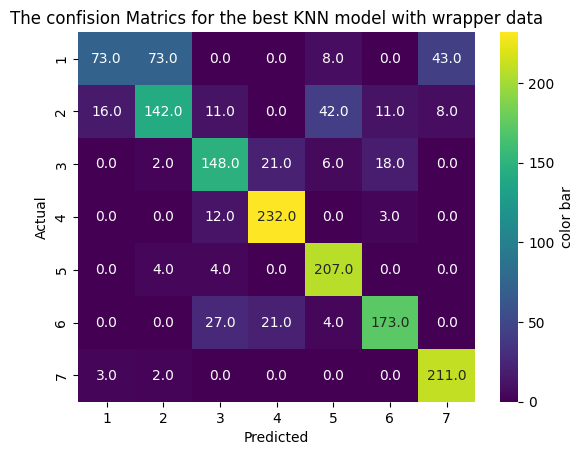

In [ ]:
#Plot The confision Matrics for the best KNN model with wrapper data
conf_knn_wrapper=confusion_matrix(y_test, BEST_y_pred_KNN_wrapper)
print('The confision Matrics for the best KNN model with wrapper data"\n ',conf_knn_wrapper)
title='The confision Matrics for the best KNN model with wrapper data'
plot(conf_knn_wrapper,title)

In [ ]:
#filter    X_train_best_subset_dt_filter, X_test_best_subset_dt_filter,best_accuracy_dt_filter,BEST_y_pred_DT_Filter  best_accuracy_dt_filter  ,best_num_features_dt_filter
#filter    X_train_best_subset_knn_filter, X_test_best_subset_knn_filter,best_accuracy_knn_filter,BEST_y_pred_KNN_Filter ,best_accuracy_knn_filter ,best_num_features_knn_filter
#wrapper   X_train_best_subset_dt_wrapper, X_test_best_subset_dt_wrapper,best_accuracy_dt_wrapper,BEST_y_pred_Dt_wrapper ,best_accuracy_dt_wrapper, best_num_features_dt_wrapper
#wrapper   X_train_best_subset_knn_wrapper, X_test_best_subset_knn_wrapper,best_accuracy_knn_wrapper,BEST_y_pred_KNN_wrapper ,best_accuracy_knn_wrapper best_num_features_knn_wrapper

print(X_train_best_subset_dt_filter)
print(X_test_best_subset_dt_filter)
print(best_accuracy_dt_filter )
print(best_num_features_dt_filter)
#..................................
print(X_train_best_subset_knn_filter)
print(X_test_best_subset_knn_filter)
print(best_accuracy_knn_filter )
print(best_num_features_knn_filter )
#.............................
print(X_train_best_subset_dt_wrapper)
print(X_test_best_subset_dt_wrapper)
print(best_accuracy_dt_wrapper )
print(best_num_features_dt_wrapper)
#......................
print(X_train_best_subset_knn_wrapper)
print(X_test_best_subset_knn_wrapper)
print(best_accuracy_knn_wrapper )
print(best_num_features_knn_wrapper )
datasets =pd.DataFrame({
    "Decision Tree (Filter)": {"X_train": X_train_best_subset_dt_filter, "X_test": X_test_best_subset_dt_filter, "accuracy": best_accuracy_dt_filter, "num_features": best_num_features_dt_filter},
    "KNN (Filter)": {"X_train": X_train_best_subset_knn_filter, "X_test": X_test_best_subset_knn_filter, "accuracy": best_accuracy_knn_filter, "num_features": best_num_features_knn_filter},
    "Decision Tree (Wrapper)": {"X_train": X_train_best_subset_dt_wrapper, "X_test": X_test_best_subset_dt_wrapper, "accuracy": best_accuracy_dt_wrapper, "num_features": best_num_features_dt_wrapper},
    "KNN (Wrapper)": {"X_train": X_train_best_subset_knn_wrapper, "X_test": X_test_best_subset_knn_wrapper, "accuracy": best_accuracy_knn_wrapper, "num_features": best_num_features_knn_wrapper}
})

# Find the dataset with the best accuracy
best_dataset = max(datasets, key=lambda x: datasets[x]["accuracy"])

# Print the best dataset information
print("Best Dataset: ", best_dataset)
print("Accuracy: ", datasets[best_dataset]["accuracy"])
print("Number of Features: ", datasets[best_dataset]["num_features"])

[[0.54176864 0.56042296 0.46       ... 0.         0.         0.        ]
 [0.93180766 0.62487412 0.24       ... 0.         0.         0.        ]
 [0.67762418 0.76636455 0.14       ... 0.         0.         0.        ]
 ...
 [0.61049011 0.74874119 0.36       ... 1.         0.         0.        ]
 [0.63860044 0.93856999 0.34       ... 0.         0.         1.        ]
 [0.13334215 0.7633434  0.         ... 0.         1.         0.        ]]
[[0.55585687 0.48338369 0.4        ... 0.         0.         0.        ]
 [0.87433031 0.29707956 0.14       ... 0.         0.         0.        ]
 [0.5059197  0.6510574  0.12       ... 0.         0.         0.        ]
 ...
 [0.15523513 0.46374622 0.24       ... 0.         0.         0.        ]
 [0.82154904 0.24169184 0.28       ... 0.         0.         0.        ]
 [0.23817713 0.12134945 0.18       ... 0.         0.         0.        ]]
0.7809836065573771
39
[[0.56042296 0.07073716 0.37430854 ... 0.         0.         0.        ]
 [0.62487412 0.11

In [ ]:
datasets.to_csv('Feature_data.csv')

# wrapper

SequentialFeatureSelector is a feature selection . It is used to select the k most important features from the input data based on a specified scoring function.

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector

def wrapper_feature_selection(model, X_train, X_test, y_train, k):
    # Create the SequentialFeatureSelector with the chosen model and number of features to select
    sfs = SequentialFeatureSelector(model, k_features=k, forward=True, floating=False, scoring='accuracy', cv=0)

    # Fit the selector on the training data
    sfs.fit(X_train, y_train)

    # Get the selected feature indices
    selected_feature_indices = sfs.k_feature_idx_

    # Transform the training and test data to keep only the selected features
    X_train_wrapper = X_train[:, selected_feature_indices]
    X_test_wrapper = X_test[:, selected_feature_indices]

    # Train the model using the selected features
    model.fit(X_train_wrapper, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_wrapper)

    # Calculate accuracy on the test set
    accuracy = accuracy_score(y_test, y_pred)

    return X_train_wrapper, X_test_wrapper, accuracy, y_pred


**Decision tree model**

best accuracy is:  0.6911475409836065 when number of features is: 5
best accuracy is:  0.6970491803278689 when number of features is: 6
best accuracy is:  0.7291803278688525 when number of features is: 7
best accuracy is:  0.7291803278688525 when number of features is: 7
best accuracy is:  0.7291803278688525 when number of features is: 7
best accuracy is:  0.7350819672131148 when number of features is: 10
best accuracy is:  0.7475409836065574 when number of features is: 11
best accuracy is:  0.7475409836065574 when number of features is: 11
best accuracy is:  0.7475409836065574 when number of features is: 11
best accuracy is:  0.7547540983606558 when number of features is: 14
best accuracy is:  0.7547540983606558 when number of features is: 14
best accuracy is:  0.7547540983606558 when number of features is: 14
best accuracy is:  0.7547540983606558 when number of features is: 14
best accuracy is:  0.7547540983606558 when number of features is: 14
best accuracy is:  0.7547540983606558 w

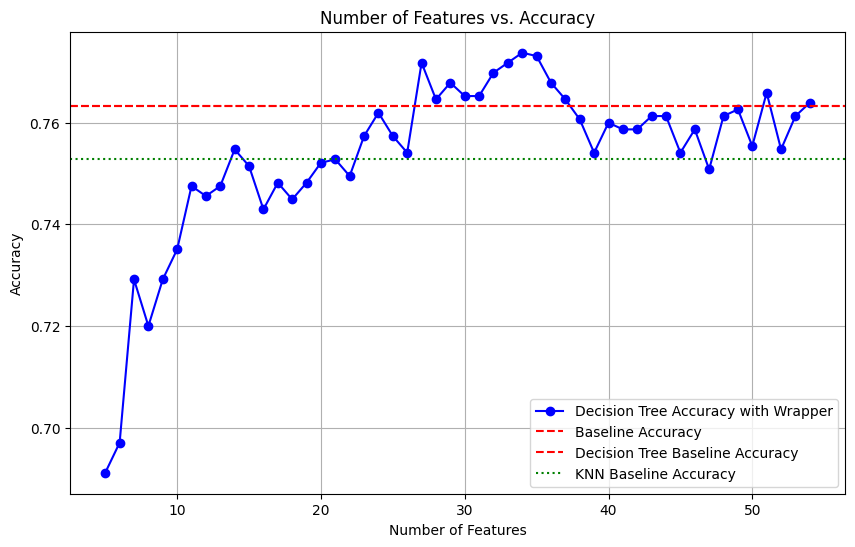

In [ ]:
# Initialize a list to store accuracy scores for different feature selection sizes
dt_Baseline=dt_accuracy
KNN_Baseline=KNN_accuracy
d_t_accuracies_wrap = []
number_of_features = 54
best_accuracy_dt_wrapper = 0
best_num_features_dt_wrapper = 0

# Loop through different numbers of features from 5 to 55
for num_features in range(5, number_of_features+1):
    # Perform feature selection
    model = DecisionTreeClassifier(random_state=42)  # Default Decision Tree model
    X_train_filtered, X_test_filtered,accuracy,y_pred = wrapper_feature_selection(model, X_train_scale, X_test_scale, y_train, num_features)

    d_t_accuracies_wrap.append(accuracy)

    # Store the best feature subset
    if accuracy > best_accuracy_dt_wrapper:
        best_accuracy_dt_wrapper = accuracy
        best_num_features_dt_wrapper = num_features
    print("best accuracy is: ",best_accuracy_dt_wrapper, "when number of features is:", best_num_features_dt_wrapper)
# Get the best feature subset using the number of features that achieved the best accuracy
model = DecisionTreeClassifier(random_state=42)
X_train_best_subset_dt_wrapper, X_test_best_subset_dt_wrapper,best_accuracy_dt_wrapper,BEST_y_pred_Dt_wrapper  = wrapper_feature_selection(model, X_train_scale, X_test_scale, y_train, best_num_features_dt_wrapper)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(range(5, number_of_features+1), d_t_accuracies_wrap, marker='o', linestyle='-', color='b', label='Decision Tree Accuracy with Wrapper')
plt.axhline(y=dt_accuracy, color='r', linestyle='--', label='Baseline Accuracy')
plt.axhline(y=dt_Baseline, color='r', linestyle='--', label='Decision Tree Baseline Accuracy')
plt.axhline(y=KNN_Baseline, color='g', linestyle='dotted', label='KNN Baseline Accuracy ')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Number of Features vs. Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
d_t_accuracies_wrap

[0.6911475409836065,
 0.6970491803278689,
 0.7291803278688525,
 0.72,
 0.7291803278688525,
 0.7350819672131148,
 0.7475409836065574,
 0.7455737704918033,
 0.7475409836065574,
 0.7547540983606558,
 0.7514754098360655,
 0.7429508196721312,
 0.7481967213114754,
 0.7449180327868853,
 0.7481967213114754,
 0.7521311475409836,
 0.7527868852459016,
 0.7495081967213115,
 0.7573770491803279,
 0.7619672131147541,
 0.7573770491803279,
 0.7540983606557377,
 0.7718032786885246,
 0.7645901639344262,
 0.7678688524590164,
 0.7652459016393443,
 0.7652459016393443,
 0.7698360655737705,
 0.7718032786885246,
 0.7737704918032787,
 0.7731147540983606,
 0.7678688524590164,
 0.7645901639344262,
 0.760655737704918,
 0.7540983606557377,
 0.76,
 0.7586885245901639,
 0.7586885245901639,
 0.761311475409836,
 0.761311475409836,
 0.7540983606557377,
 0.7586885245901639,
 0.7508196721311475,
 0.761311475409836,
 0.7626229508196721,
 0.7554098360655738,
 0.7659016393442623,
 0.7547540983606558,
 0.761311475409836,
 0.7

The confision Matrics for the best decision tree model with wrapper data"
  [[ 76  71   1   0   8   0  41]
 [ 34 146   9   0  29   7   5]
 [  0   3 146  12   0  34   0]
 [  0   0   9 231   0   7   0]
 [  2   8   4   0 200   1   0]
 [  0   6  30  11   7 171   0]
 [  3   3   0   0   0   0 210]]


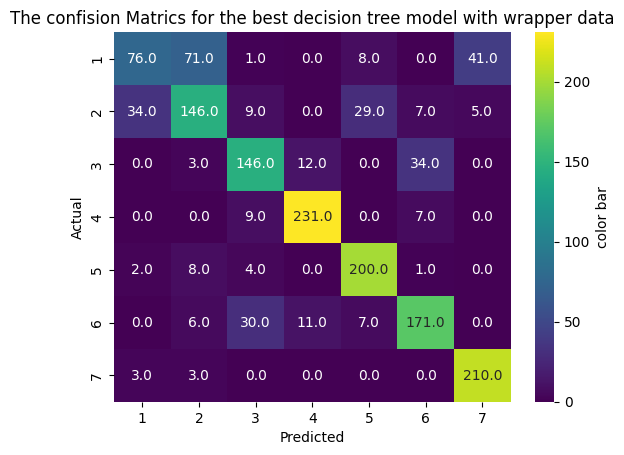

In [ ]:
#Plot The confision Matrics for the best decision tree model with filtered data
conf_DT_wrapper=confusion_matrix(y_test, BEST_y_pred_Dt_wrapper)
print('The confision Matrics for the best decision tree model with wrapper data"\n ',conf_DT_wrapper)
title='The confision Matrics for the best decision tree model with wrapper data'
plot(conf_DT_wrapper,title)

**KNN model**

best accuracy is:  0.7672131147540984 when number of features is: 5
best accuracy is:  0.7704918032786885 when number of features is: 6
best accuracy is:  0.7750819672131147 when number of features is: 7
best accuracy is:  0.7757377049180327 when number of features is: 8
best accuracy is:  0.7777049180327869 when number of features is: 9
best accuracy is:  0.7777049180327869 when number of features is: 9
best accuracy is:  0.7777049180327869 when number of features is: 9
best accuracy is:  0.7777049180327869 when number of features is: 9
best accuracy is:  0.7777049180327869 when number of features is: 9
best accuracy is:  0.7777049180327869 when number of features is: 9
best accuracy is:  0.7777049180327869 when number of features is: 9
best accuracy is:  0.7777049180327869 when number of features is: 9
best accuracy is:  0.7777049180327869 when number of features is: 9
best accuracy is:  0.7777049180327869 when number of features is: 9
best accuracy is:  0.7777049180327869 when numbe

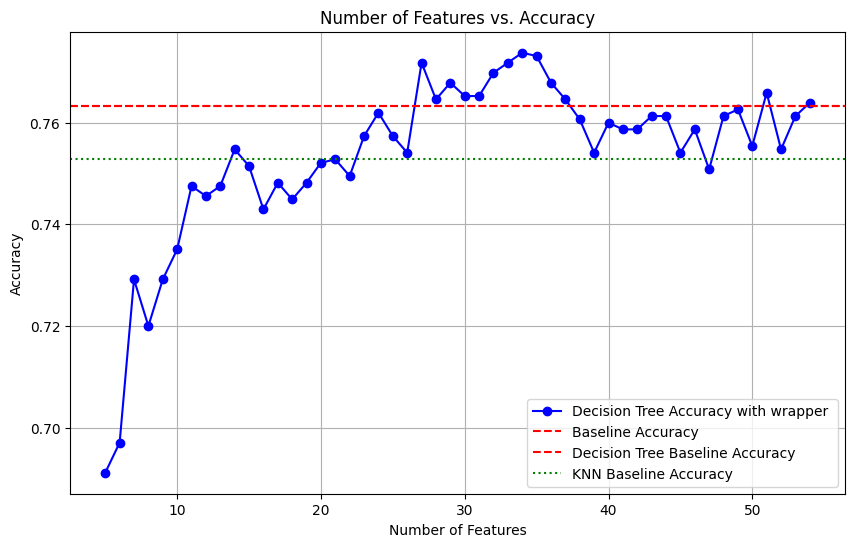

In [ ]:
# Initialize a list to store accuracy scores for different feature selection sizes
dt_Baseline=dt_accuracy
KNN_Baseline=KNN_accuracy
Knn_accuracies_wrap = []
number_of_features = 54
best_accuracy_knn_wrapper = 0
best_num_features_knn_wrapper = 0

# Loop through different numbers of features from 5 to 55
for num_features in range(5, number_of_features+1):
    # Perform feature selection
    model = KNeighborsClassifier()  # Default Decision Tree model
    X_train_filtered, X_test_filtered,accuracy,y_pred = wrapper_feature_selection(model, X_train_scale, X_test_scale, y_train, num_features)

    Knn_accuracies_wrap.append(accuracy)

    # Store the best feature subset
    if accuracy > best_accuracy_knn_wrapper:
        best_accuracy_knn_wrapper = accuracy
        best_num_features_knn_wrapper = num_features
    print("best accuracy is: ",best_accuracy_knn_wrapper, "when number of features is:", best_num_features_knn_wrapper)
# Get the best feature subset using the number of features that achieved the best accuracy
model = KNeighborsClassifier()
X_train_best_subset_knn_wrapper, X_test_best_subset_knn_wrapper,best_accuracy_knn_wrapper,BEST_y_pred_KNN_wrapper  = wrapper_feature_selection(model, X_train_scale, X_test_scale, y_train, best_num_features_knn_wrapper)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(range(5, number_of_features+1), d_t_accuracies_wrap, marker='o', linestyle='-', color='b', label='KNN Accuracy with wrapper ')
plt.axhline(y=dt_accuracy, color='r', linestyle='--', label='Baseline Accuracy')
plt.axhline(y=dt_Baseline, color='r', linestyle='--', label='Decision Tree Baseline Accuracy')
plt.axhline(y=KNN_Baseline, color='g', linestyle='dotted', label='KNN Baseline Accuracy ')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Number of Features vs. Accuracy')
plt.legend()
plt.grid(True)
plt.show()

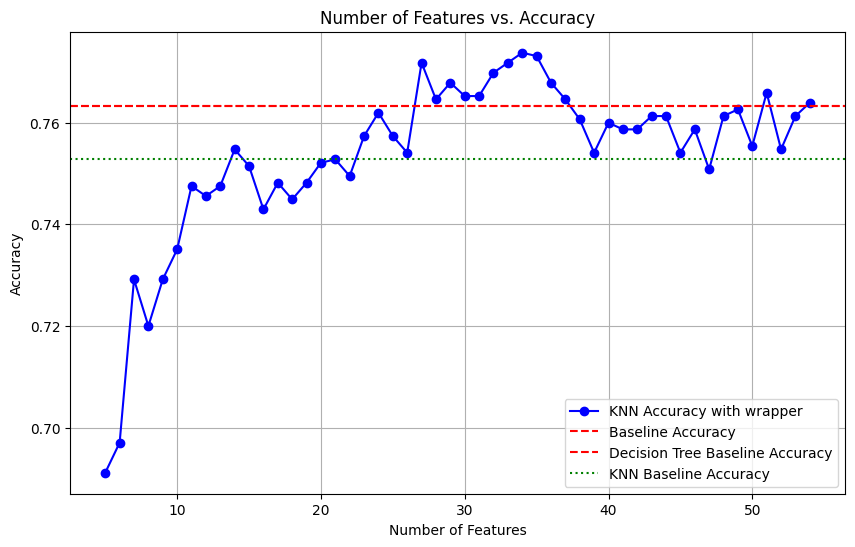

In [ ]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(range(5, number_of_features+1), d_t_accuracies_wrap, marker='o', linestyle='-', color='b', label='KNN Accuracy with wrapper ')
plt.axhline(y=dt_accuracy, color='r', linestyle='--', label='Baseline Accuracy')
plt.axhline(y=dt_Baseline, color='r', linestyle='--', label='Decision Tree Baseline Accuracy')
plt.axhline(y=KNN_Baseline, color='g', linestyle='dotted', label='KNN Baseline Accuracy ')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Number of Features vs. Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
Knn_accuracies_wrap


[0.7672131147540984,
 0.7704918032786885,
 0.7750819672131147,
 0.7757377049180327,
 0.7777049180327869,
 0.7744262295081967,
 0.7750819672131147,
 0.7750819672131147,
 0.7744262295081967,
 0.7737704918032787,
 0.7711475409836066,
 0.7704918032786885,
 0.7704918032786885,
 0.7704918032786885,
 0.7665573770491804,
 0.7665573770491804,
 0.7659016393442623,
 0.7659016393442623,
 0.7659016393442623,
 0.7652459016393443,
 0.7639344262295082,
 0.7639344262295082,
 0.7639344262295082,
 0.7659016393442623,
 0.76,
 0.7586885245901639,
 0.759344262295082,
 0.7580327868852459,
 0.76,
 0.7495081967213115,
 0.7534426229508197,
 0.7540983606557377,
 0.7560655737704918,
 0.7554098360655738,
 0.759344262295082,
 0.759344262295082,
 0.761311475409836,
 0.7652459016393443,
 0.7645901639344262,
 0.7645901639344262,
 0.7659016393442623,
 0.760655737704918,
 0.761311475409836,
 0.76,
 0.76,
 0.741639344262295,
 0.7422950819672132,
 0.7475409836065574,
 0.7396721311475409,
 0.7324590163934426]

The confision Matrics for the best KNN model with wrapper data"
  [[ 73  73   0   0   8   0  43]
 [ 16 142  11   0  42  11   8]
 [  0   2 148  21   6  18   0]
 [  0   0  12 232   0   3   0]
 [  0   4   4   0 207   0   0]
 [  0   0  27  21   4 173   0]
 [  3   2   0   0   0   0 211]]


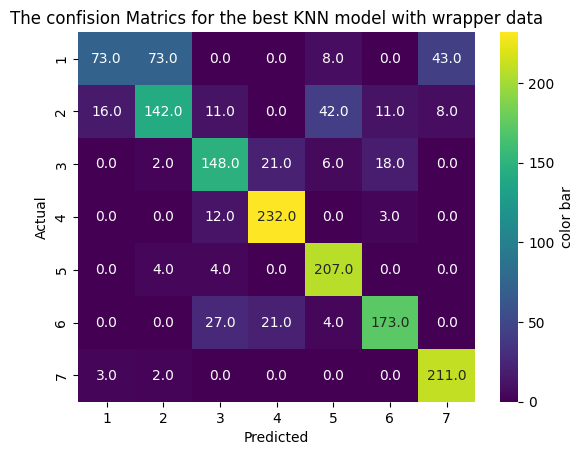

In [ ]:
#Plot The confision Matrics for the best KNN model with wrapper data
conf_knn_wrapper=confusion_matrix(y_test, BEST_y_pred_KNN_wrapper)
print('The confision Matrics for the best KNN model with wrapper data"\n ',conf_knn_wrapper)
title='The confision Matrics for the best KNN model with wrapper data'
plot(conf_knn_wrapper,title)

#save ouput from wrapper

In [ ]:
dataset1 = pd.DataFrame({
    "Decision Tree (Filter)": {"X_train": X_train_best_subset_dt_filter, "X_test": X_test_best_subset_dt_filter, "accuracy": best_accuracy_dt_filter, "num_features": best_num_features_dt_filter},
    "KNN (Filter)": {"X_train": X_train_best_subset_knn_filter, "X_test": X_test_best_subset_knn_filter, "accuracy": best_accuracy_knn_filter, "num_features": best_num_features_knn_filter},
    "Decision Tree (Wrapper)": {"X_train": X_train_best_subset_dt_wrapper, "X_test": X_test_best_subset_dt_wrapper, "accuracy": best_accuracy_dt_wrapper, "num_features": best_num_features_dt_wrapper} })

In [ ]:
dataset1

Decision Tree (Filter)  \
X_train       [[0.5417686354917653, 0.5604229607250755, 0.46...   
X_test        [[0.5558568688405318, 0.4833836858006042, 0.4,...   
accuracy                                               0.780984   
num_features                                                 39   

                                                   KNN (Filter)  \
X_train       [[0.5604229607250755, 0.07073715562174236, 0.3...   
X_test        [[0.4833836858006042, 0.426656738644825, 0.400...   
accuracy                                               0.778361   
num_features                                                 31   

                                        Decision Tree (Wrapper)  
X_train       [[0.5417686354917653, 0.5604229607250755, 0.23...  
X_test        [[0.5558568688405318, 0.4833836858006042, 0.28...  
accuracy                                                0.77377  
num_features                                                 34

In [ ]:
dataset1.to_csv('simi_features_data.csv')

In [ ]:
accuracies_of_Wrapper=pd.DataFrame({'Desicion tree accuracies with wRAPPER':d_t_accuracies_wrap,'KNN accuracies with wRAPPER':Knn_accuracies_wrap})
accuracies_of_Wrapper

Desicion tree accuracies with wRAPPER  KNN accuracies with wRAPPER
0                                0.691148                     0.767213
1                                0.697049                     0.770492
2                                0.729180                     0.775082
3                                0.720000                     0.775738
4                                0.729180                     0.777705
5                                0.735082                     0.774426
6                                0.747541                     0.775082
7                                0.745574                     0.775082
8                                0.747541                     0.774426
9                                0.754754                     0.773770
10                               0.751475                     0.771148
11                               0.742951                     0.770492
12                               0.748197                     0.770492
13                               0.744918                     0.770492
14                               0.748197                     0.766557
15                               0.752131                     0.766557
16                               0.752787                     0.765902
17                               0.749508                     0.765902
18                               0.757377                     0.765902
19                               0.761967                     0.765246
20                               0.757377                     0.763934
21                               0.754098                     0.763934
22                               0.771803                     0.763934
23                               0.764590                     0.765902
24                               0.767869                     0.760000
25                               0.765246                     0.758689
26                               0.765246                     0.759344
27                               0.769836                     0.758033
28                               0.771803                     0.760000
29                               0.773770                     0.749508
30                               0.773115                     0.753443
31                               0.767869                     0.754098
32                               0.764590                     0.756066
33                               0.760656                     0.755410
34                               0.754098                     0.759344
35                               0.760000                     0.759344
36                               0.758689                     0.761311
37                               0.758689                     0.765246
38                               0.761311                     0.764590
39                               0.761311                     0.764590
40                               0.754098                     0.765902
41                               0.758689                     0.760656
42                               0.750820                     0.761311
43                               0.761311                     0.760000
44                               0.762623                     0.760000
45                               0.755410                     0.741639
46                               0.765902                     0.742295
47                               0.754754                     0.747541
48                               0.761311                     0.739672
49                               0.763934                     0.732459

import numpy as np
from google.colab import autoviz
df_3876951679361597330 = autoviz.get_df('df_3876951679361597330')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3876951679361597330, *['Desicion tree accuracies with wRAPPER'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3876951679361597330 = autoviz.get_df('df_3876951679361597330')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3876951679361597330, *['KNN accuracies with wRAPPER'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3876951679361597330 = autoviz.get_df('df_3876951679361597330')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3876951679361597330, *['Desicion tree accuracies with wRAPPER'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3876951679361597330 = autoviz.get_df('df_3876951679361597330')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3876951679361597330, *['KNN accuracies with wRAPPER'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3876951679361597330 = autoviz.get_df('df_3876951679361597330')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_3876951679361597330, *[[['Desicion tree accuracies with wRAPPER', 'KNN accuracies with wRAPPER']]], **{})
chart

In [ ]:
accuracies_of_Wrapper.to_csv('accuracies_of_Wrapper.csv')

# compare for part1 and 2

* Best Dataset:  Decision Tree (Filter)
* Accuracy:  0.7809836065573771
* Number of Features:  39

In [ ]:
#filter    X_train_best_subset_dt_filter, X_test_best_subset_dt_filter,best_accuracy_dt_filter,BEST_y_pred_DT_Filter  best_accuracy_dt_filter  ,best_num_features_dt_filter
#filter    X_train_best_subset_knn_filter, X_test_best_subset_knn_filter,best_accuracy_knn_filter,BEST_y_pred_KNN_Filter ,best_accuracy_knn_filter ,best_num_features_knn_filter
#wrapper   X_train_best_subset_dt_wrapper, X_test_best_subset_dt_wrapper,best_accuracy_dt_wrapper,BEST_y_pred_Dt_wrapper ,best_accuracy_dt_wrapper, best_num_features_dt_wrapper
#wrapper   X_train_best_subset_knn_wrapper, X_test_best_subset_knn_wrapper,best_accuracy_knn_wrapper,BEST_y_pred_KNN_wrapper ,best_accuracy_knn_wrapper best_num_features_knn_wrapper

print(X_train_best_subset_dt_filter)
print(X_test_best_subset_dt_filter)
print(best_accuracy_dt_filter )
print(best_num_features_dt_filter)
#..................................
print(X_train_best_subset_knn_filter)
print(X_test_best_subset_knn_filter)
print(best_accuracy_knn_filter )
print(best_num_features_knn_filter )
#.............................
print(X_train_best_subset_dt_wrapper)
print(X_test_best_subset_dt_wrapper)
print(best_accuracy_dt_wrapper )
print(best_num_features_dt_wrapper)
#......................
print(X_train_best_subset_knn_wrapper)
print(X_test_best_subset_knn_wrapper)
print(best_accuracy_knn_wrapper )
print(best_num_features_knn_wrapper )
datasets =pd.DataFrame({
    "Decision Tree (Filter)": {"X_train": X_train_best_subset_dt_filter, "X_test": X_test_best_subset_dt_filter, "accuracy": best_accuracy_dt_filter, "num_features": best_num_features_dt_filter},
    "KNN (Filter)": {"X_train": X_train_best_subset_knn_filter, "X_test": X_test_best_subset_knn_filter, "accuracy": best_accuracy_knn_filter, "num_features": best_num_features_knn_filter},
    "Decision Tree (Wrapper)": {"X_train": X_train_best_subset_dt_wrapper, "X_test": X_test_best_subset_dt_wrapper, "accuracy": best_accuracy_dt_wrapper, "num_features": best_num_features_dt_wrapper},
    "KNN (Wrapper)": {"X_train": X_train_best_subset_knn_wrapper, "X_test": X_test_best_subset_knn_wrapper, "accuracy": best_accuracy_knn_wrapper, "num_features": best_num_features_knn_wrapper}
})

# Find the dataset with the best accuracy
best_dataset = max(datasets, key=lambda x: datasets[x]["accuracy"])

# Print the best dataset information
print("Best Dataset: ", best_dataset)
print("Accuracy: ", datasets[best_dataset]["accuracy"])
print("Number of Features: ", datasets[best_dataset]["num_features"])

[[0.54176864 0.56042296 0.46       ... 0.         0.         0.        ]
 [0.93180766 0.62487412 0.24       ... 0.         0.         0.        ]
 [0.67762418 0.76636455 0.14       ... 0.         0.         0.        ]
 ...
 [0.61049011 0.74874119 0.36       ... 1.         0.         0.        ]
 [0.63860044 0.93856999 0.34       ... 0.         0.         1.        ]
 [0.13334215 0.7633434  0.         ... 0.         1.         0.        ]]
[[0.55585687 0.48338369 0.4        ... 0.         0.         0.        ]
 [0.87433031 0.29707956 0.14       ... 0.         0.         0.        ]
 [0.5059197  0.6510574  0.12       ... 0.         0.         0.        ]
 ...
 [0.15523513 0.46374622 0.24       ... 0.         0.         0.        ]
 [0.82154904 0.24169184 0.28       ... 0.         0.         0.        ]
 [0.23817713 0.12134945 0.18       ... 0.         0.         0.        ]]
0.7809836065573771
39
[[0.56042296 0.07073716 0.37430854 ... 0.         0.         0.        ]
 [0.62487412 0.11

In [ ]:
datasets.to_csv('Feature_data2.csv')

**plot the models**

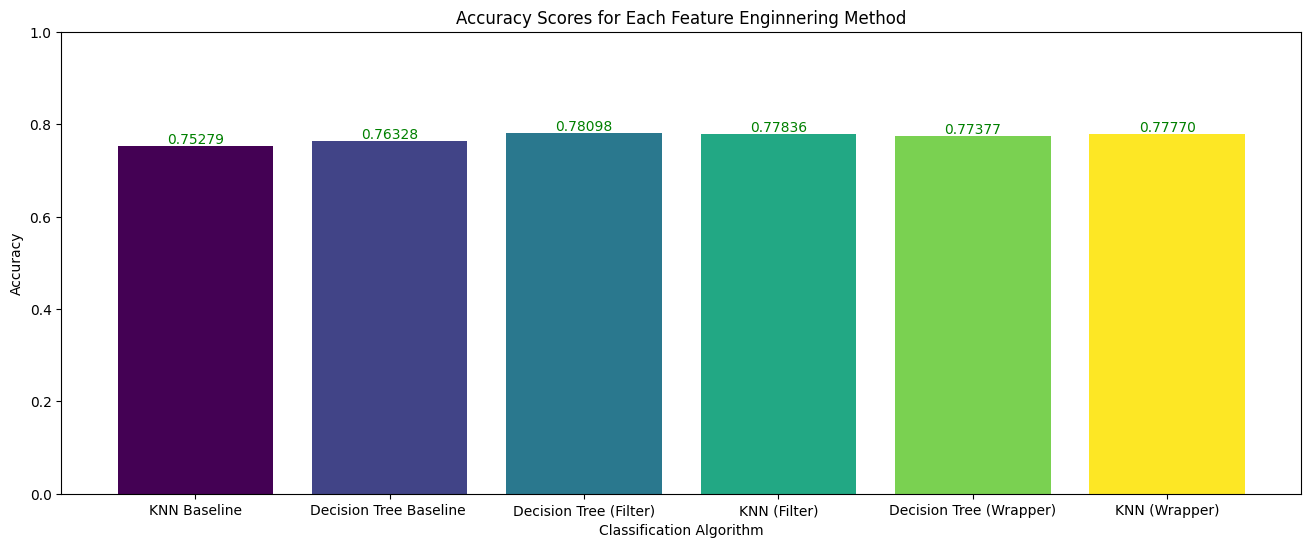

In [ ]:
# Plotting a bar chart the accuracy scores
methods = ['KNN Baseline', 'Decision Tree Baseline ','Decision Tree (Filter)','KNN (Filter)',	'Decision Tree (Wrapper)','KNN (Wrapper)']
#conv_name = ['The confusion matrix of KNN classifier', 'The confusion matrix of Logistic Regression classifier', 'The confusion matrix of SVM classifier', 'The confusion matrix of Decision Tree Classifier', 'The confusion matrix of Naive Bayes classifier']
accuracies = [KNN_Baseline,  dt_Baseline, best_accuracy_dt_filter, best_accuracy_knn_filter, best_accuracy_dt_wrapper, best_accuracy_knn_wrapper]
#confusion_matricxs=[KNN_conf,lr_conf,svm_conf,dt_conf,nb_conf]
# Adding value labels to the bar chart
plt.figure(figsize=(16, 6))
plt.bar_label(plt.bar(methods, accuracies, color = cm.viridis(np.linspace(0, 1, len(accuracies)))), labels=[f"{acc:.5f}" for acc in accuracies], fontsize=10, color="Green")
plt.title('Accuracy Scores for Each Feature Enginnering Method')
plt.xlabel('Classification Algorithm')
plt.ylabel('Accuracy')
plt.ylim((0, 1))      # It sets the y-axis limits for a plot to be between 0 and 1
plt.show()

**The champion model is Decision tree with filter data**

#additional part (Dimensionality Rediction With PCA)

In [40]:
# Import necessary libraries
import numpy as np
from sklearn.decomposition import PCA

# Apply PCA for feature reduction
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a KNN classifier on the PCA-transformed data
knn = KNeighborsClassifier()
knn.fit(X_train_pca, y_train)

# Train a Decision Tree classifier on the PCA-transformed data
dt = DecisionTreeClassifier()
dt.fit(X_train_pca, y_train)

# Evaluate the performance of the classifiers on the test set
print("KNN classifier accuracy:", knn.score(X_test_pca, y_test))
print("Decision Tree classifier accuracy:", dt.score(X_test_pca, y_test))

KNN classifier accuracy: 0.6032786885245902
Decision Tree classifier accuracy: 0.6196721311475409


# Adding more machine learning model (Q3)

**with normal data**



**Random Forest model**

Random Forest accuracy: 0.8222950819672131
The confision Matrics for RandomForestClassifier model"
  [[ 73  68   0   0  11   0  45]
 [  9 171   7   0  31   7   5]
 [  0   0 163  14   1  17   0]
 [  0   0   1 245   0   1   0]
 [  0   1   3   0 210   1   0]
 [  0   0  28  15   4 178   0]
 [  2   0   0   0   0   0 214]]


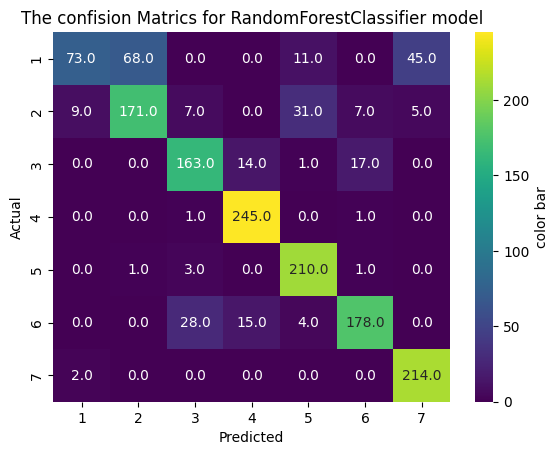

In [41]:
# RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest accuracy:", accuracy_rf)
#Plot The confision Matrics for RandomForestClassifier model
conf_RF=confusion_matrix(y_test, y_pred_rf)
print('The confision Matrics for RandomForestClassifier model"\n ',conf_RF)
title='The confision Matrics for RandomForestClassifier model'
plot(conf_RF,title)

**AdaBoost model**

AdaBoost accuracy: 0.3442622950819672
The confision Matrics for AdaBoost model"
  [[ 90   0   0   0  81   0  26]
 [ 31   0  22   0 169   0   8]
 [  0   0 180   0  15   0   0]
 [  0   0 247   0   0   0   0]
 [  0   0  16   0 199   0   0]
 [  0   0 199   0  26   0   0]
 [160   0   0   0   0   0  56]]


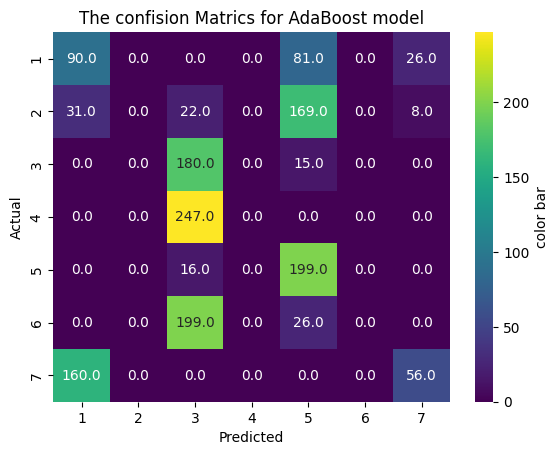

In [42]:
# Train AdaBoost model
#AdaBoostClassifier(estimator=None, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None, base_estimator='deprecated')
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print("AdaBoost accuracy:", accuracy_ada)
#Plot The confision Matrics for RandomForestClassifier model
conf_ADA=confusion_matrix(y_test, y_pred_ada)
print('The confision Matrics for AdaBoost model"\n ',conf_ADA)
title='The confision Matrics for AdaBoost model'
plot(conf_ADA,title)

**Gradient Boosting model**

Gradient Boosting accuracy: 0.779016393442623
The confision Matrics for Gradient Boosting model"
  [[ 81  65   0   0  13   0  38]
 [ 21 146   9   0  41   6   7]
 [  0   0 149  18   5  23   0]
 [  0   0   4 241   0   2   0]
 [  0   5   5   0 201   4   0]
 [  0   1  47  10  11 156   0]
 [  2   0   0   0   0   0 214]]


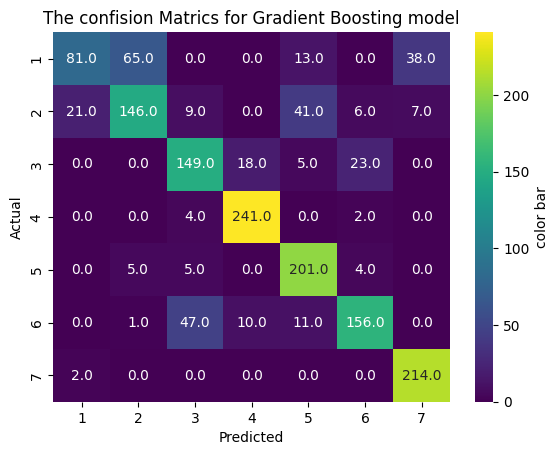

In [43]:
# Train Gradient Boosting model
# GradientBoostingClassifier( loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
gb_model = GradientBoostingClassifier(random_state=42 )
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting accuracy:", accuracy_gb)
#Plot The confision Matrics for RandomForestClassifier model
conf_GB=confusion_matrix(y_test, y_pred_gb)
print('The confision Matrics for Gradient Boosting model"\n ',conf_GB)
title='The confision Matrics for Gradient Boosting model'
plot(conf_GB,title)

# Q3 with Filter data

**Random Forest model**

Random Forest accuracy: 0.8347540983606557
The confision Matrics for RandomForestClassifier model"
  [[ 84  68   0   0   9   0  36]
 [ 15 167   9   0  27   8   4]
 [  0   0 165  11   3  16   0]
 [  0   0   3 242   0   2   0]
 [  0   2   3   0 209   1   0]
 [  0   0  20  14   1 190   0]
 [  0   0   0   0   0   0 216]]


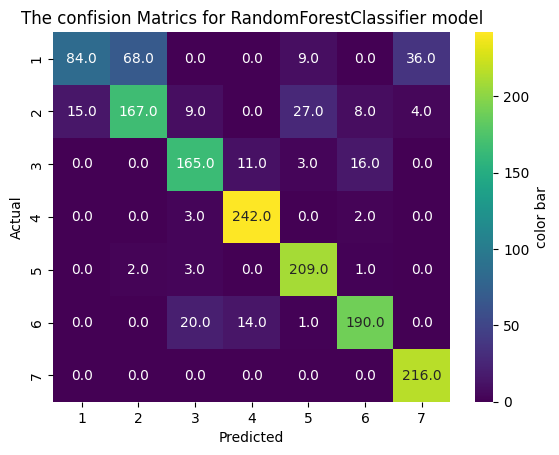

In [44]:
# RandomForestClassifier with Filter data
 #(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
rf_model_f = RandomForestClassifier(n_estimators=100,random_state=42)
rf_model_f.fit(X_train_best_subset_dt_filter,y_train_DT_filter)
y_pred_rf_f = rf_model_f.predict(X_test_best_subset_dt_filter)
accuracy_rf_f = accuracy_score(y_test, y_pred_rf_f)
print("Random Forest accuracy:", accuracy_rf_f)
#Plot The confision Matrics for RandomForestClassifier model
conf_RF_f=confusion_matrix(y_test, y_pred_rf_f)
print('The confision Matrics for RandomForestClassifier model"\n ',conf_RF_f)
title='The confision Matrics for RandomForestClassifier model'
plot(conf_RF_f,title)

**AdaBoost model**

AdaBoost accuracy: 0.5108196721311475
The confision Matrics for AdaBoost model"
  [[ 37  79   0   0  13   0  68]
 [ 21 126   3   0  53   9  18]
 [  0   2  95  33  10  55   0]
 [  0   0  47 200   0   0   0]
 [  3  98   0   0  99  15   0]
 [  0   9 123  26  13  54   0]
 [ 25  23   0   0   0   0 168]]


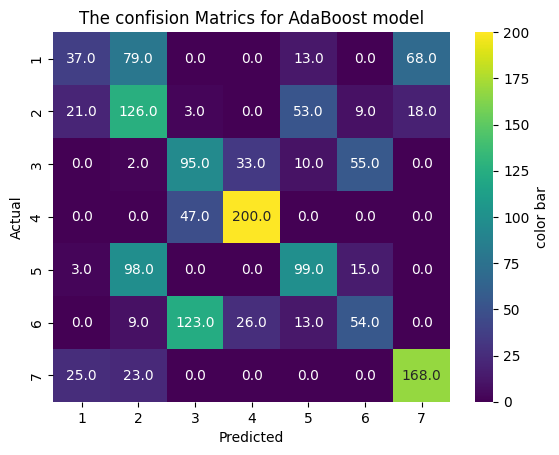

In [45]:
# Train AdaBoost model with Filter data
#AdaBoostClassifier(estimator=None, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None, base_estimator='deprecated')
ada_model_f = AdaBoostClassifier(n_estimators=100,random_state=42,algorithm='SAMME')
ada_model_f.fit(X_train_best_subset_dt_filter,y_train_DT_filter)
y_pred_ada_f = ada_model_f.predict(X_test_best_subset_dt_filter)
accuracy_ada_f = accuracy_score(y_test, y_pred_ada_f)
print("AdaBoost accuracy:", accuracy_ada_f)
#Plot The confision Matrics for RandomForestClassifier model
conf_ADA_f=confusion_matrix(y_test, y_pred_ada_f)
print('The confision Matrics for AdaBoost model"\n ',conf_ADA_f)
title='The confision Matrics for AdaBoost model'
plot(conf_ADA_f,title)

**Gradient Boosting model**

Gradient Boosting accuracy: 0.7763934426229508
The confision Matrics for Gradient Boosting model"
  [[ 84  60   0   0  13   0  40]
 [ 25 140   5   0  44   9   7]
 [  0   0 153  12   5  25   0]
 [  0   0  10 235   0   2   0]
 [  0   4   4   0 206   1   0]
 [  0   0  49  10  14 152   0]
 [  2   0   0   0   0   0 214]]


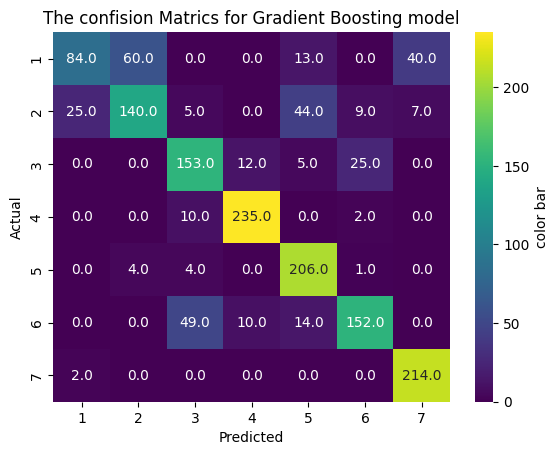

In [46]:
# Train Gradient Boosting model with Filter data
# GradientBoostingClassifier( loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
gb_model_f = GradientBoostingClassifier(n_estimators=100, random_state=42 )
gb_model_f.fit(X_train_best_subset_dt_filter,y_train_DT_filter)
y_pred_gb_f = gb_model_f.predict(X_test_best_subset_dt_filter)
accuracy_gb_f = accuracy_score(y_test, y_pred_gb_f)
print("Gradient Boosting accuracy:", accuracy_gb_f)
#Plot The confision Matrics for RandomForestClassifier model
conf_GB_f=confusion_matrix(y_test, y_pred_gb_f)
print('The confision Matrics for Gradient Boosting model"\n ',conf_GB_f)
title='The confision Matrics for Gradient Boosting model'
plot(conf_GB_f,title)

In [47]:
X_train_best_subset_dt_filter, X_test_best_subset_dt_filter ,y_train_DT_filter

(array([[0.54176864, 0.56042296, 0.46      , ..., 0.        , 0.        ,
         0.        ],
        [0.93180766, 0.62487412, 0.24      , ..., 0.        , 0.        ,
         0.        ],
        [0.67762418, 0.76636455, 0.14      , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.61049011, 0.74874119, 0.36      , ..., 1.        , 0.        ,
         0.        ],
        [0.63860044, 0.93856999, 0.34      , ..., 0.        , 0.        ,
         1.        ],
        [0.13334215, 0.7633434 , 0.        , ..., 0.        , 1.        ,
         0.        ]]),
 array([[0.55585687, 0.48338369, 0.4       , ..., 0.        , 0.        ,
         0.        ],
        [0.87433031, 0.29707956, 0.14      , ..., 0.        , 0.        ,
         0.        ],
        [0.5059197 , 0.6510574 , 0.12      , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.15523513, 0.46374622, 0.24      , ..., 0.        , 0.        ,
         0.        ],
        [0.8

#compar part 1 & 2 & 3

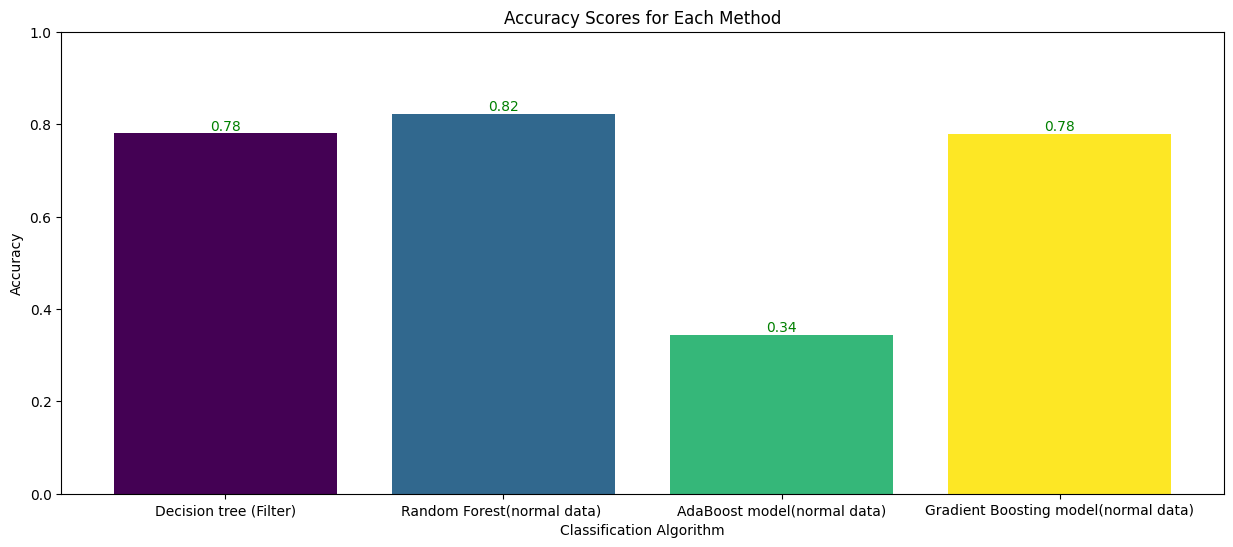

In [ ]:
# Plotting a bar chart the accuracy scores
methods = ['Decision tree (Filter)','Random Forest(normal data) ' , 'AdaBoost model(normal data)','Gradient Boosting model(normal data)']
accuracies = [ best_accuracy_dt_filter,  accuracy_rf, accuracy_ada, accuracy_gb]

# Adding value labels to the bar chart
plt.figure(figsize=(15, 6))
plt.bar_label(plt.bar(methods, accuracies, color = cm.viridis(np.linspace(0, 1, len(accuracies)))), labels=[f"{acc:.2f}" for acc in accuracies], fontsize=10, color="Green")
plt.title('Accuracy Scores for Each Method')
plt.xlabel('Classification Algorithm')
plt.ylabel('Accuracy')
plt.ylim((0, 1))      # It sets the y-axis limits for a plot to be between 0 and 1
plt.show()

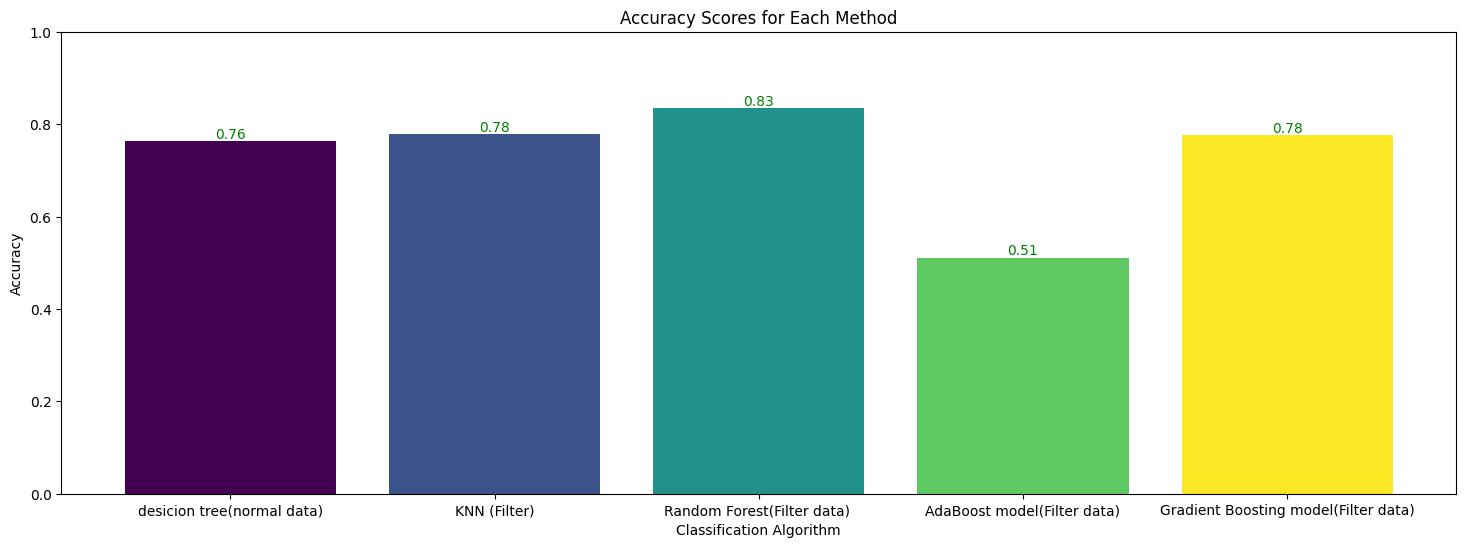

In [ ]:
# Plotting a bar chart the accuracy scores
methods = ['desicion tree(normal data)','KNN (Filter)','Random Forest(Filter data) ' , 'AdaBoost model(Filter data)','Gradient Boosting model(Filter data)']
accuracies = [dt_Baseline , best_accuracy_knn_filter,  accuracy_rf_f, accuracy_ada_f, accuracy_gb_f]

# Adding value labels to the bar chart
plt.figure(figsize=(18, 6))
plt.bar_label(plt.bar(methods, accuracies, color = cm.viridis(np.linspace(0, 1, len(accuracies)))), labels=[f"{acc:.2f}" for acc in accuracies], fontsize=10, color="Green")
plt.title('Accuracy Scores for Each Method')
plt.xlabel('Classification Algorithm')
plt.ylabel('Accuracy')
plt.ylim((0, 1))      # It sets the y-axis limits for a plot to be between 0 and 1
plt.show()

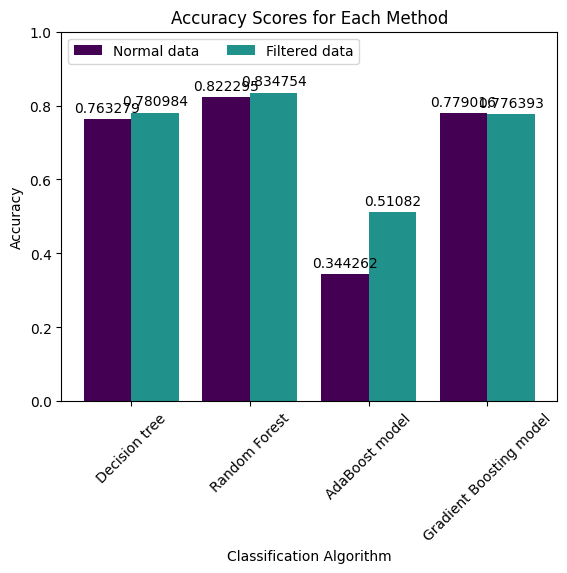

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

methods = ("Decision tree", "Random Forest", "AdaBoost model", "Gradient Boosting model")
accuracies = {
    'Normal data': (dt_Baseline, accuracy_rf, accuracy_ada, accuracy_gb),
    'Filtered data': (best_accuracy_dt_filter, accuracy_rf_f, accuracy_ada_f, accuracy_gb_f),
}
x = np.arange(len(methods))  # the label locations
width = 0.4  # the width of the bars
multiplier = 0
fig, ax = plt.subplots()

for attribute, measurement in accuracies.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=plt.cm.viridis(multiplier/len(accuracies)))
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Accuracy Scores for Each Method')
ax.set_xlabel('Classification Algorithm')
ax.set_ylabel('Accuracy')
plt.ylim((0, 1))      # It sets the y-axis limits for a plot to be between 0 and 1
ax.set_xticks(x + width / 2 * (len(accuracies) - 1), methods)
ax.set_xticklabels(methods, rotation=45)
ax.legend(loc='upper left', ncols=3)
plt.show()

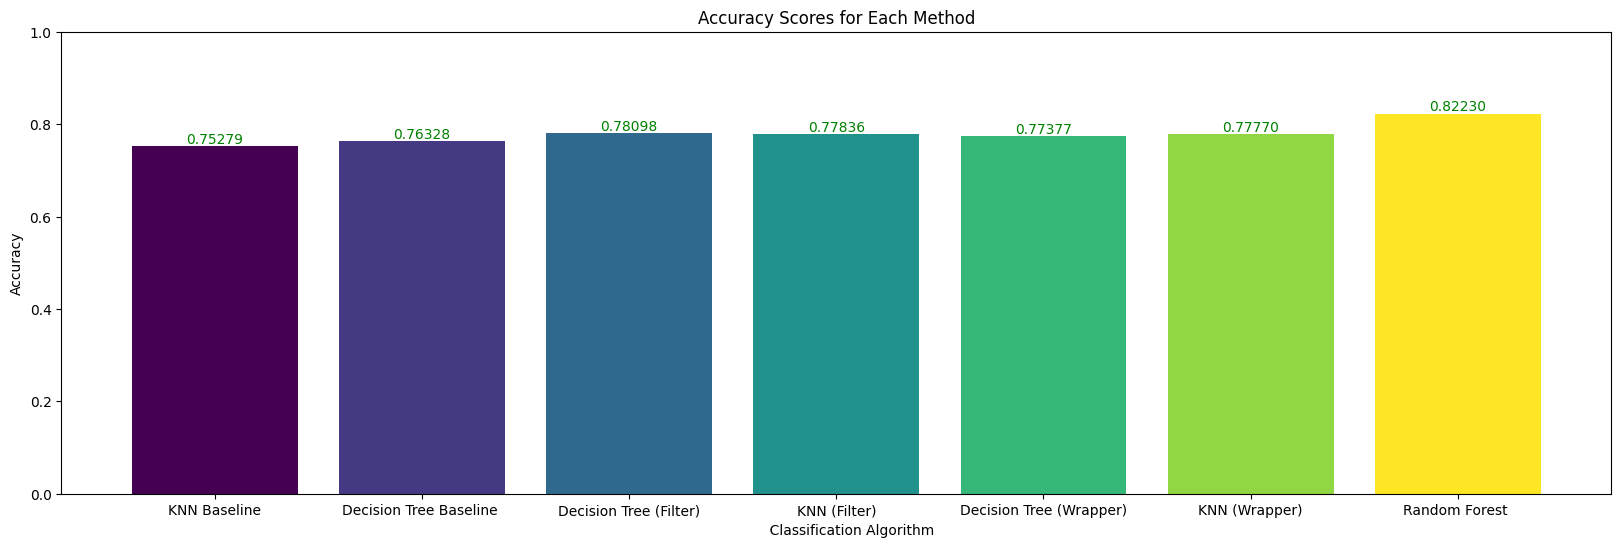

In [ ]:
# Plotting a bar chart the accuracy scores
methods = ['KNN Baseline', 'Decision Tree Baseline ','Decision Tree (Filter)','KNN (Filter)',	'Decision Tree (Wrapper)','KNN (Wrapper)','Random Forest ']
#conv_name = ['The confusion matrix of KNN classifier', 'The confusion matrix of Logistic Regression classifier', 'The confusion matrix of SVM classifier', 'The confusion matrix of Decision Tree Classifier', 'The confusion matrix of Naive Bayes classifier']
accuracies = [KNN_Baseline,  dt_Baseline, best_accuracy_dt_filter, best_accuracy_knn_filter, best_accuracy_dt_wrapper, best_accuracy_knn_wrapper,accuracy_rf]
#confusion_matricxs=[KNN_conf,lr_conf,svm_conf,dt_conf,nb_conf]
# Adding value labels to the bar chart
plt.figure(figsize=(20, 6))
plt.bar_label(plt.bar(methods, accuracies, color = cm.viridis(np.linspace(0, 1, len(accuracies)))), labels=[f"{acc:.5f}" for acc in accuracies], fontsize=10, color="Green")
plt.title('Accuracy Scores for Each Method')
plt.xlabel('       Classification Algorithm')
plt.ylabel('Accuracy')
plt.ylim((0, 1))      # It sets the y-axis limits for a plot to be between 0 and 1
plt.show()

# Unsupervised learning Approach

# Supervised learning Approach (modification of the ML modelsHyperParmeter) additional part

**KNN classifier**

In [ ]:
# with standardization of the data
#KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None) default
KNNm=KNeighborsClassifier(weights="distance", metric='euclidean')
KNNm.fit(X_train_scale ,y_train)
KNN_per=KNNm.predict(X_test_scale)
KNN_accuracy=accuracy_score(y_test ,KNN_per)
KNN_conf=confusion_matrix(y_test ,KNN_per)
print("the accuracy of the KNN is :",KNN_accuracy)

the accuracy of the KNN is : 0.7396721311475409


**Logistic Regression**

In [ ]:
#LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None) defaults
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train ,y_train)
lr_per=lr.predict(X_test)
lr_accuracy=accuracy_score(y_test ,lr_per)
lr_conf=confusion_matrix(y_test ,lr_per)
print("the accuracy of the Logistic Regression is :",lr_accuracy)


the accuracy of the Logistic Regression is : 0.580327868852459


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**SVM**

In [ ]:
svm = SVC(kernel='rbf')
svm.fit(X_train_scale ,y_train)
svm_per=svm.predict(X_test_scale)
svm_accuracy=accuracy_score(y_test ,svm_per)
svm_conf=confusion_matrix(y_test ,svm_per)
print("the accuracy of the SVM is :",svm_accuracy)

the accuracy of the SVM is : 0.6754098360655738


**DecisionTreeClassifier**

In [ ]:
#DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train ,y_train)
dt_per=dt.predict(X_test)
dt_accuracy=accuracy_score(y_test ,dt_per)
dt_conf=confusion_matrix(y_test ,dt_per)
print("the accuracy of the DecisionTreeClassifier is :",dt_accuracy)

the accuracy of the DecisionTreeClassifier is : 0.7632786885245901


**Naive Bayes Classifier**

In [ ]:
#Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train ,y_train)
nb_per=nb.predict(X_test)
nb_accuracy=accuracy_score(y_test ,nb_per)
nb_conf=confusion_matrix(y_test ,nb_per)
print("the accuracy of the Naive Bayes Classifier is :",nb_accuracy)

the accuracy of the Naive Bayes Classifier is : 0.6498360655737705


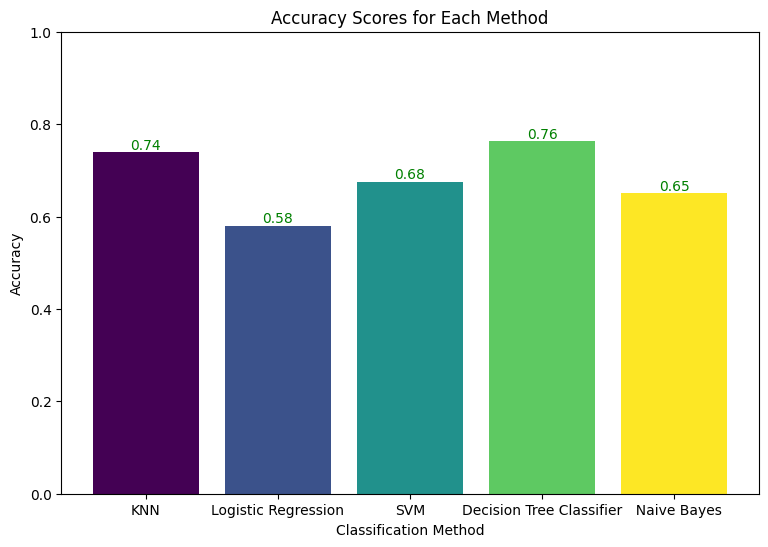

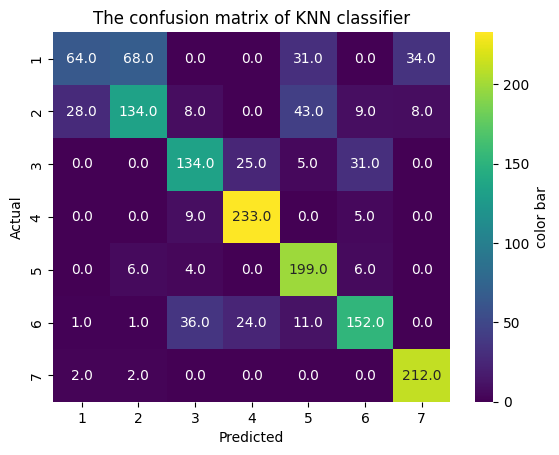

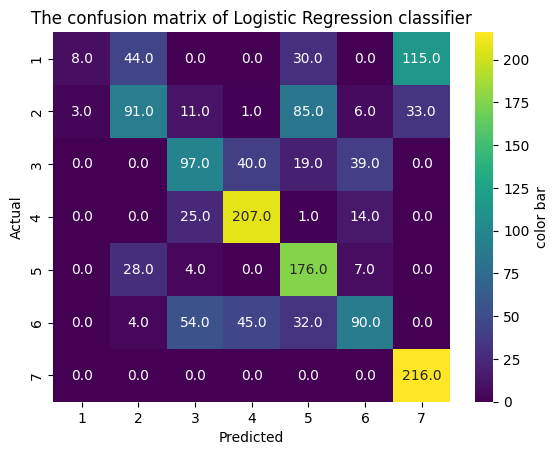

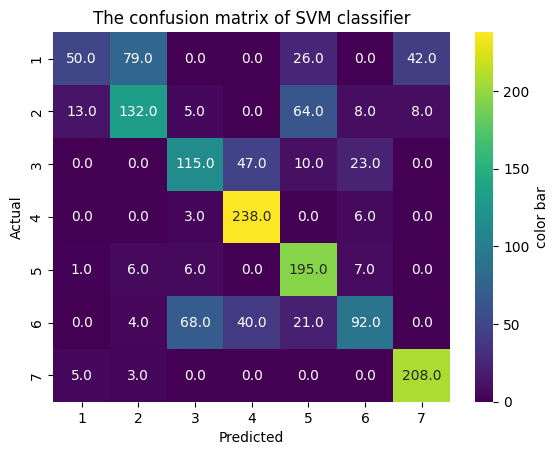

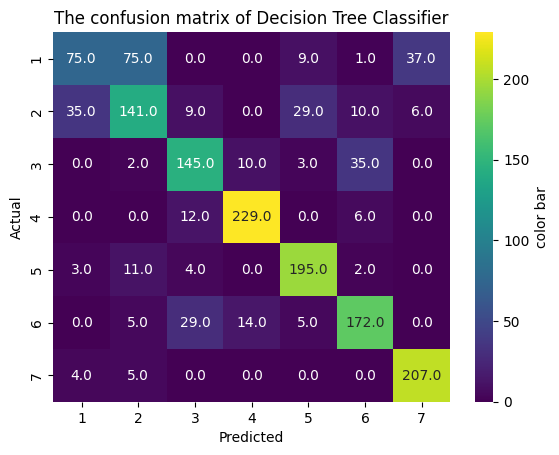

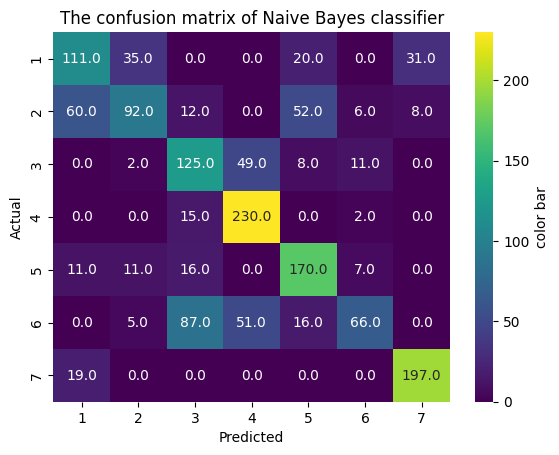

In [ ]:
# Plotting a bar chart the accuracy scores
methods = ['KNN', 'Logistic Regression', 'SVM', 'Decision Tree Classifier', '  Naive Bayes']
conv_name = ['The confusion matrix of KNN classifier', 'The confusion matrix of Logistic Regression classifier', 'The confusion matrix of SVM classifier', 'The confusion matrix of Decision Tree Classifier', 'The confusion matrix of Naive Bayes classifier']
accuracies = [KNN_accuracy, lr_accuracy, svm_accuracy, dt_accuracy, nb_accuracy]
confusion_matricxs=[KNN_conf,lr_conf,svm_conf,dt_conf,nb_conf]
# Adding value labels to the bar chart
plt.figure(figsize=(9, 6))
plt.bar_label(plt.bar(methods, accuracies, color = cm.viridis(np.linspace(0, 1, len(accuracies)))), labels=[f"{acc:.2f}" for acc in accuracies], fontsize=10, color="Green")
plt.title('Accuracy Scores for Each Method')
plt.xlabel('Classification Method')
plt.ylabel('Accuracy')
plt.ylim((0, 1))      # It sets the y-axis limits for a plot to be between 0 and 1
plt.show()
for i in range(5):
  plot(confusion_matricxs[i],conv_name[i])